Objective: To identify different segments in the existing customer based on their spending patterns as well as past interaction with the bank.

 

Key Questions:

How many different segments of customers are there?
How are these segments different from each other?
What are your recommendations to the bank on how to better market to and service these customers?

In [149]:
import warnings
warnings.filterwarnings('ignore')   # to avoid warnings

# To enable plotting graphs in Jupyter notebook
%matplotlib inline



In [150]:
# Numerical libraries
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.cluster import KMeans

# to handle data in form of rows and columns
import pandas as pd

# importing ploting libraries
import matplotlib.pyplot as plt

#importing seaborn for statistical plots
import seaborn as sns
from sklearn import metrics

# reading the CSV file into pandas dataframe
mydata = pd.read_excel("Credit Card Customer Data.xlsx")
print(mydata.head())


   Sl_No  Customer Key  Avg_Credit_Limit  Total_Credit_Cards  \
0      1         87073            100000                   2   
1      2         38414             50000                   3   
2      3         17341             50000                   7   
3      4         40496             30000                   5   
4      5         47437            100000                   6   

   Total_visits_bank  Total_visits_online  Total_calls_made  
0                  1                    1                 0  
1                  0                   10                 9  
2                  1                    3                 4  
3                  1                    1                 4  
4                  0                   12                 3  


Perform univariate analysis on the data to better understand the variables at your disposal and to get an idea about the no of clusters. Perform EDA, create visualizations to explore data. (10 marks)

In [151]:
# check datatype
mydata.info()
mydata.dtypes


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 660 entries, 0 to 659
Data columns (total 7 columns):
 #   Column               Non-Null Count  Dtype
---  ------               --------------  -----
 0   Sl_No                660 non-null    int64
 1   Customer Key         660 non-null    int64
 2   Avg_Credit_Limit     660 non-null    int64
 3   Total_Credit_Cards   660 non-null    int64
 4   Total_visits_bank    660 non-null    int64
 5   Total_visits_online  660 non-null    int64
 6   Total_calls_made     660 non-null    int64
dtypes: int64(7)
memory usage: 36.2 KB


Sl_No                  int64
Customer Key           int64
Avg_Credit_Limit       int64
Total_Credit_Cards     int64
Total_visits_bank      int64
Total_visits_online    int64
Total_calls_made       int64
dtype: object

In [152]:
##Remove sl_no and customer_key since it doesn't add value for the clustering
mydata.drop(['Sl_No','Customer Key'], axis=1, inplace=True)
mydata.head()

# null values
print('null values')
print(mydata.isnull().values.any())

# no null values


# Finding duplicates in the records

duplicate = mydata[mydata.duplicated()] 
print(duplicate)

# if any duplicate then drop
mydata=mydata.drop_duplicates()

mydata
mydata.shape



null values
False
     Avg_Credit_Limit  Total_Credit_Cards  Total_visits_bank  \
162              8000                   2                  0   
175              6000                   1                  0   
215              8000                   4                  0   
295             10000                   6                  4   
324              9000                   4                  5   
361             18000                   6                  3   
378             12000                   6                  5   
385              8000                   7                  4   
395              5000                   4                  5   
455             47000                   6                  2   
497             52000                   4                  2   

     Total_visits_online  Total_calls_made  
162                    3                 4  
175                    2                 5  
215                    4                 7  
295                    2         

(649, 5)

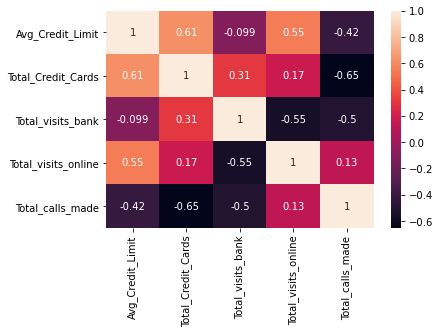

,count,mean,std,min,25%,50%,75%,max
Avg_Credit_Limit,649.0,34878.274268,37813.736638,3000.0,11000.0,18000.0,49000.0,200000.0
Total_Credit_Cards,649.0,4.708783,2.173763,1.0,3.0,5.0,6.0,10.0
Total_visits_bank,649.0,2.397535,1.625148,0.0,1.0,2.0,4.0,5.0
Total_visits_online,649.0,2.624037,2.952888,0.0,1.0,2.0,4.0,15.0
Total_calls_made,649.0,3.590139,2.877911,0.0,1.0,3.0,5.0,10.0


In [153]:



# correlation b/w the indepedent variables

corr = mydata.corr()
sns.heatmap(corr, annot = True)
plt.show()

# from the correlation below relation we can infer:
# 1. avg credit limit is +ve correlated with total credit cards and total visits online: this looks genuine
# 2. avg credit limit is -ve correlated with total calls made and +ve with total visits bank
# 3. total credit cards is -ve correlated with total calls made
# 4. total visits online and total calls made are -ve correlated with total visits bank: this seems normal. This means customers 
# making calls or visiting online don't prefer going to the banks and the vice versa.


# statistical summary
mydata.describe(include='all').transpose()


<class 'pandas.core.frame.DataFrame'>
Int64Index: 649 entries, 0 to 659
Data columns (total 5 columns):
 #   Column               Non-Null Count  Dtype
---  ------               --------------  -----
 0   Avg_Credit_Limit     649 non-null    int64
 1   Total_Credit_Cards   649 non-null    int64
 2   Total_visits_bank    649 non-null    int64
 3   Total_visits_online  649 non-null    int64
 4   Total_calls_made     649 non-null    int64
dtypes: int64(5)
memory usage: 30.4 KB
None
                     count          mean           std     min      25%  \
Avg_Credit_Limit     649.0  34878.274268  37813.736638  3000.0  11000.0   
Total_Credit_Cards   649.0      4.708783      2.173763     1.0      3.0   
Total_visits_bank    649.0      2.397535      1.625148     0.0      1.0   
Total_visits_online  649.0      2.624037      2.952888     0.0      1.0   
Total_calls_made     649.0      3.590139      2.877911     0.0      1.0   

                         50%      75%       max  
Avg_Credit_Limi

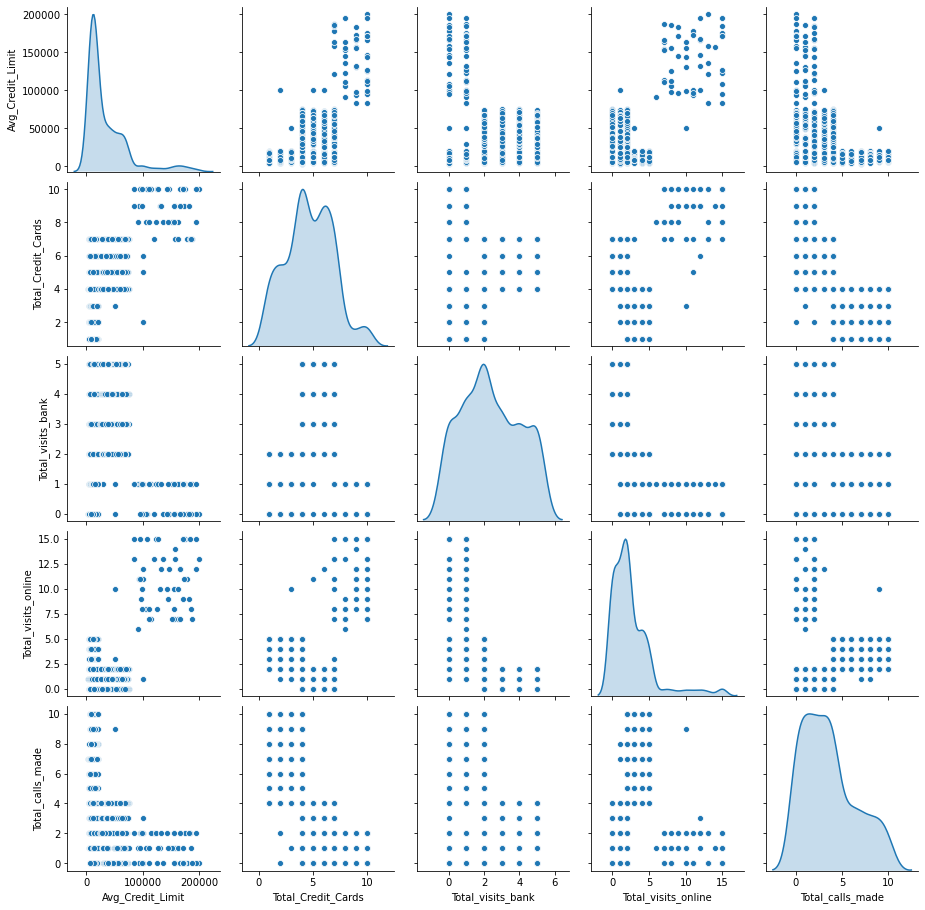

In [154]:
print(mydata.info())
print(mydata.describe().transpose())

# create pair plot
sns.pairplot(mydata, diag_kind='kde')
plt.show()

# Most of the attributes have 3 or more peaks. 
# so seems 3-6  clusters will be a good option... so to start with we can start with 3 clusters and go ahead and see how various
# KPIs work to select the best number of clusters

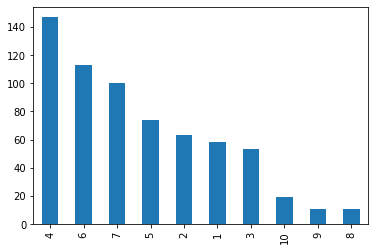

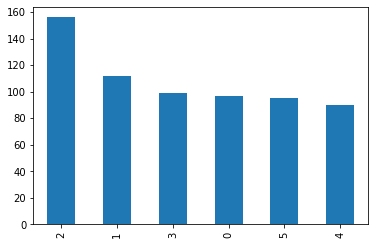

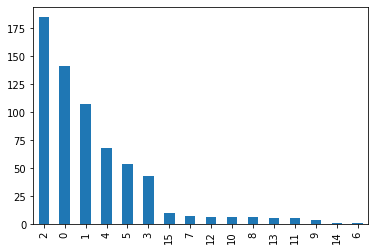

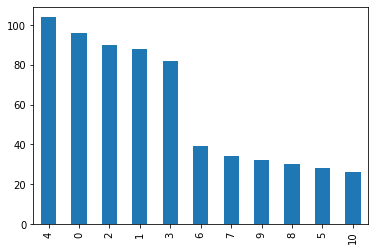

In [130]:
# check for the value count
mydata['Total_Credit_Cards'].value_counts().plot.bar()
plt.show()
mydata['Total_visits_bank'].value_counts().plot.bar()
plt.show()
mydata['Total_visits_online'].value_counts().plot.bar()
plt.show()
mydata['Total_calls_made'].value_counts().plot.bar()
plt.show()

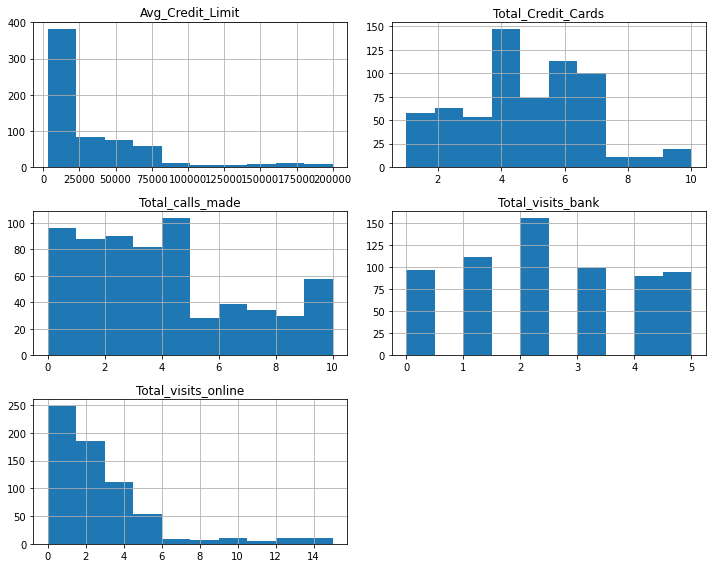

In [155]:
#Frequency variables in charts

mydata[['Avg_Credit_Limit', 'Total_Credit_Cards', 'Total_visits_bank',
       'Total_visits_online', 'Total_calls_made']].hist(figsize=(10,8))
plt.tight_layout()
plt.show()


Properly comment on the codes, provide explanations of the steps taken in the notebook and conclude your insights from the graphs. (5 marks)

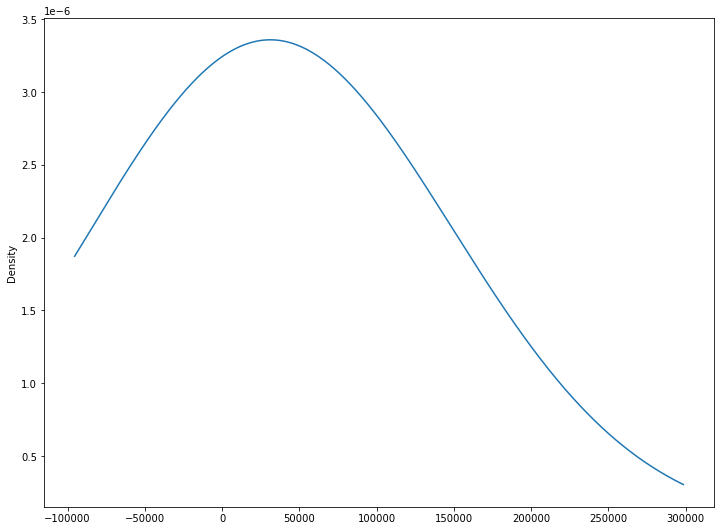

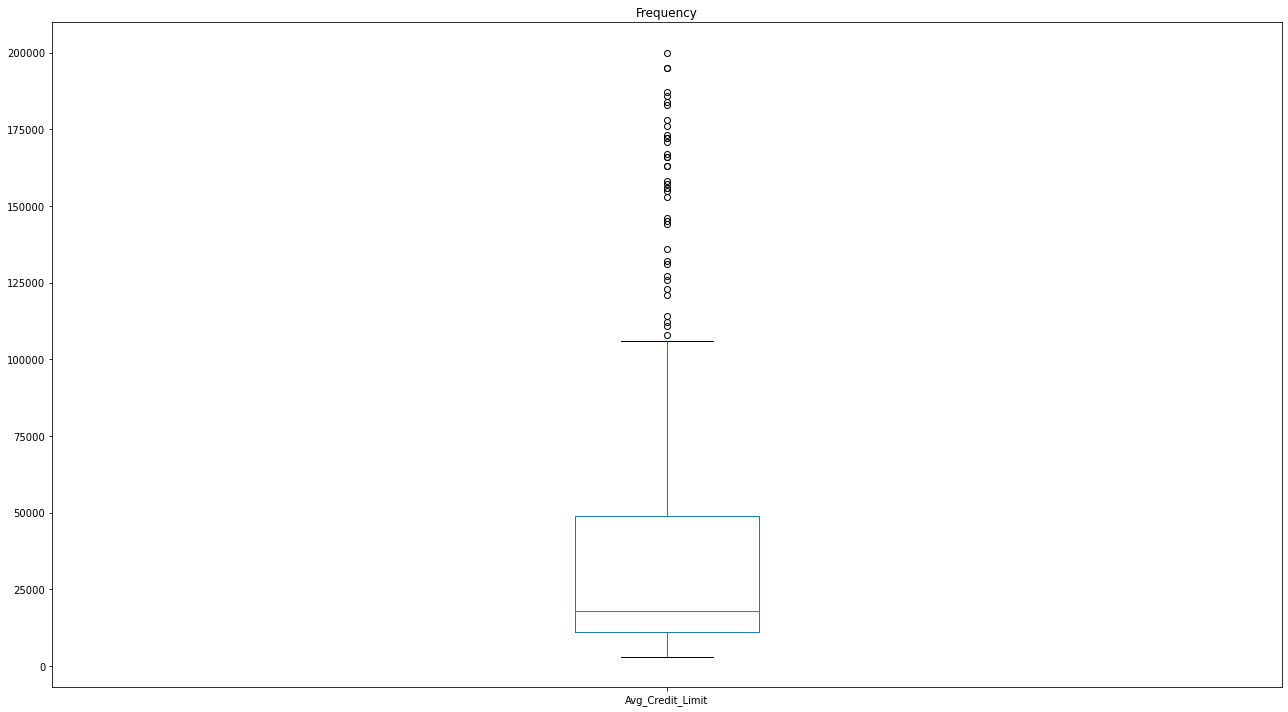

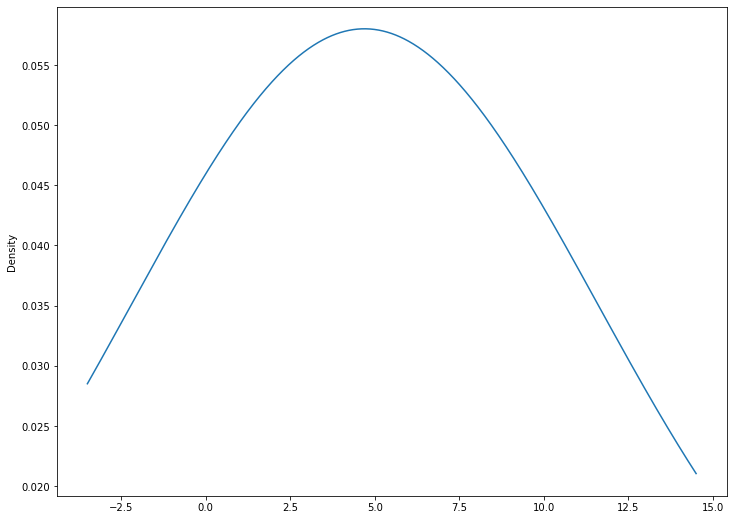

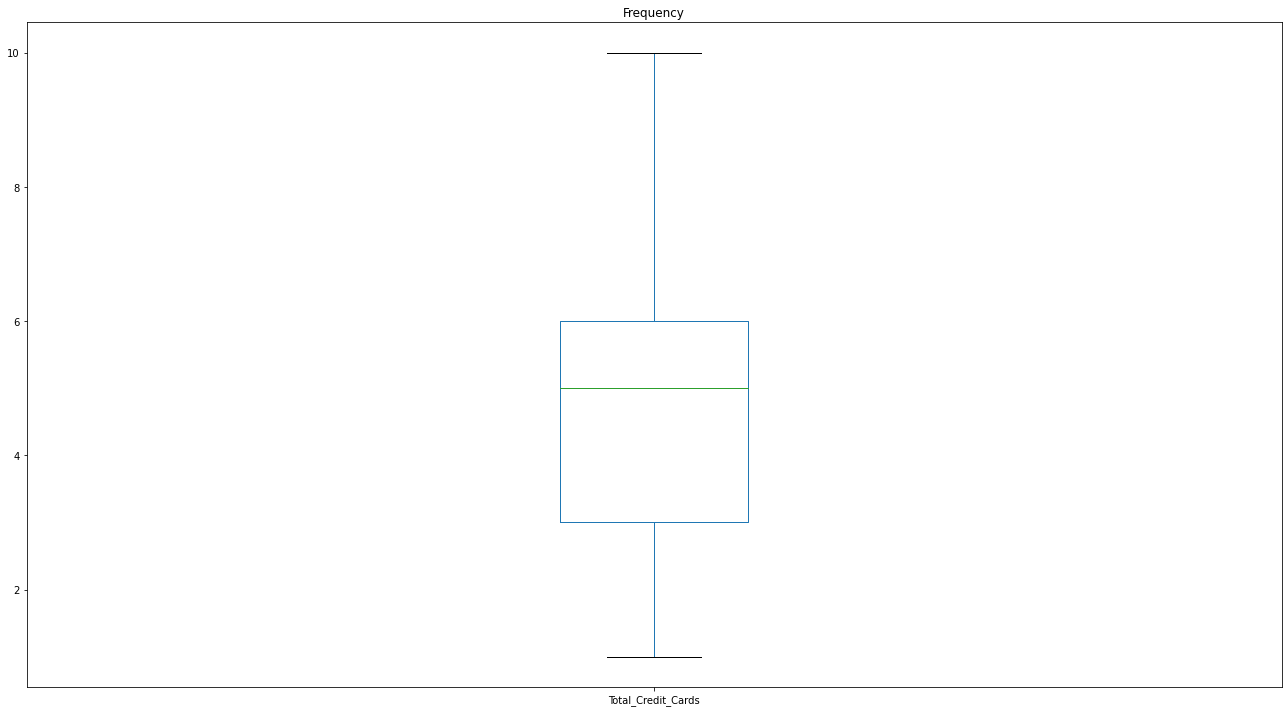

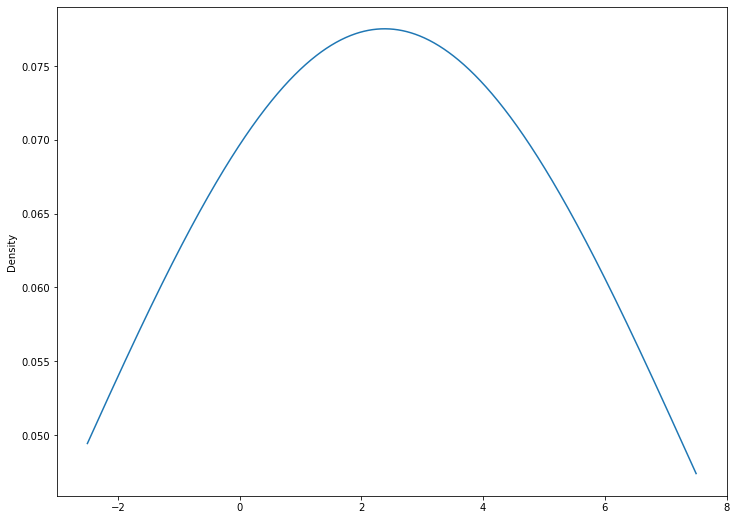

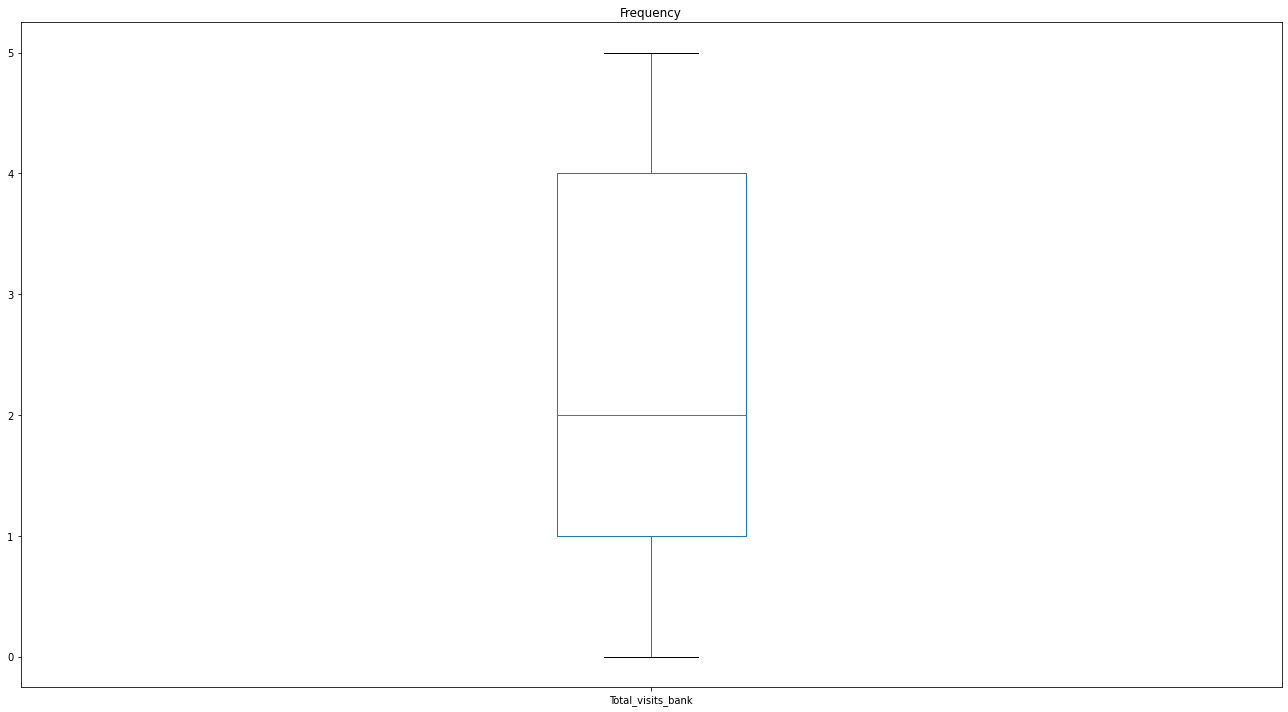

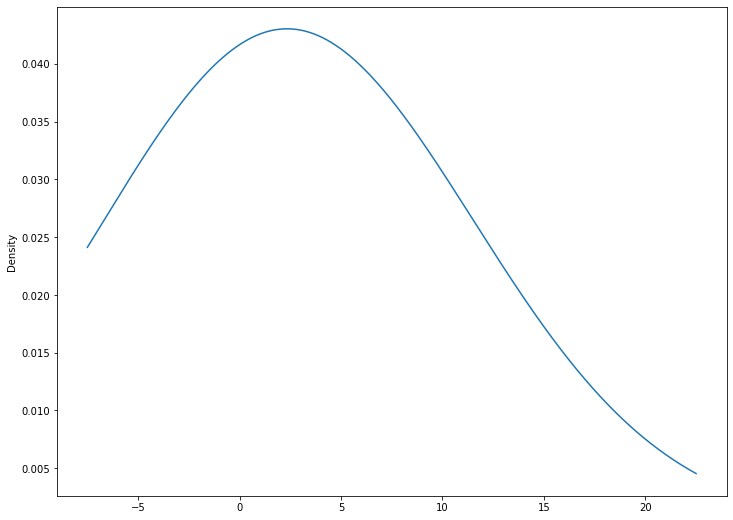

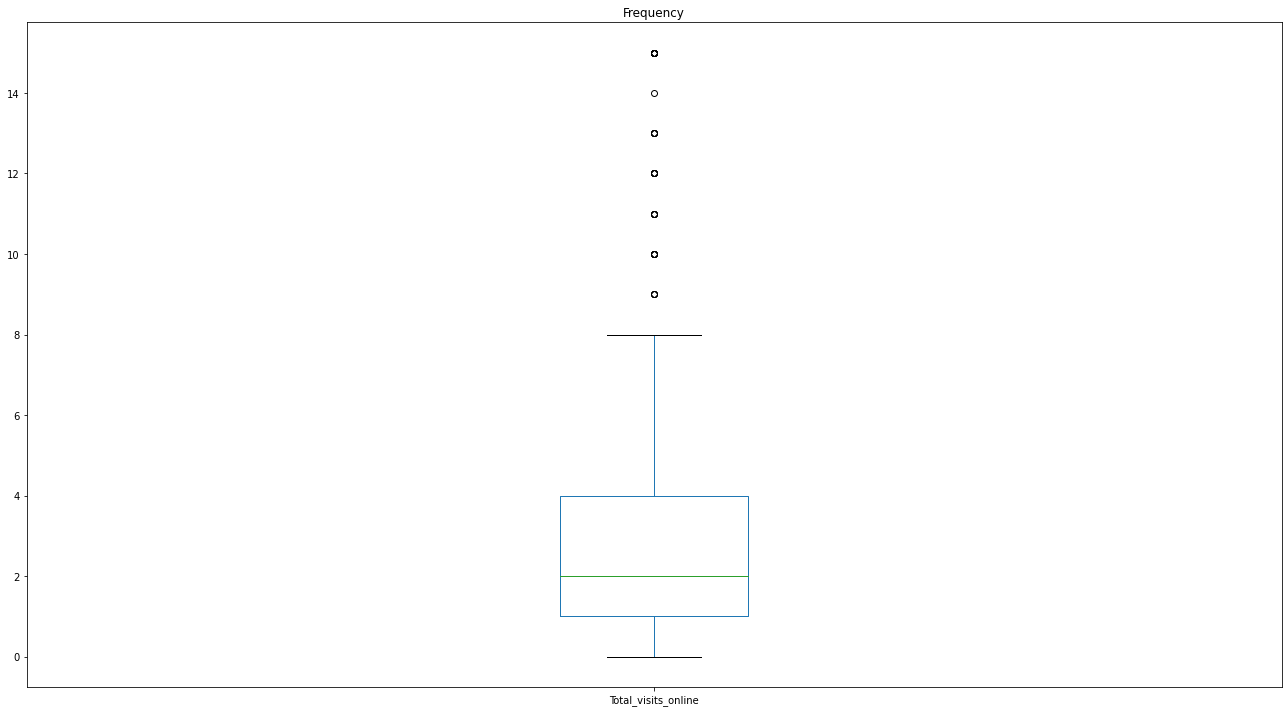

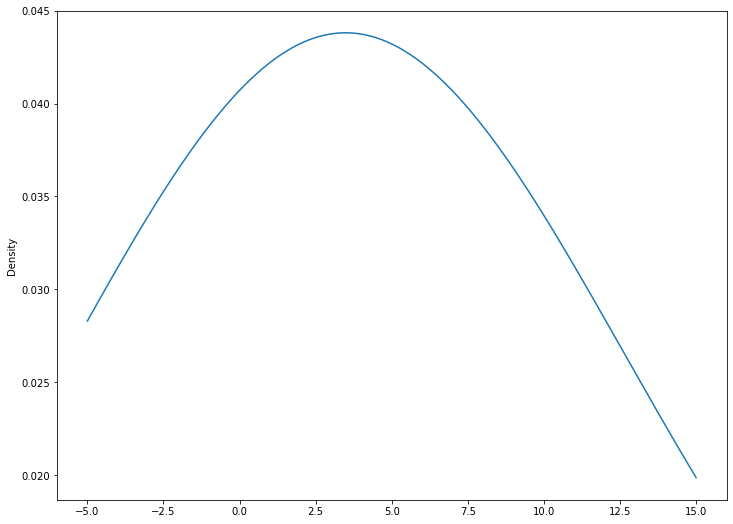

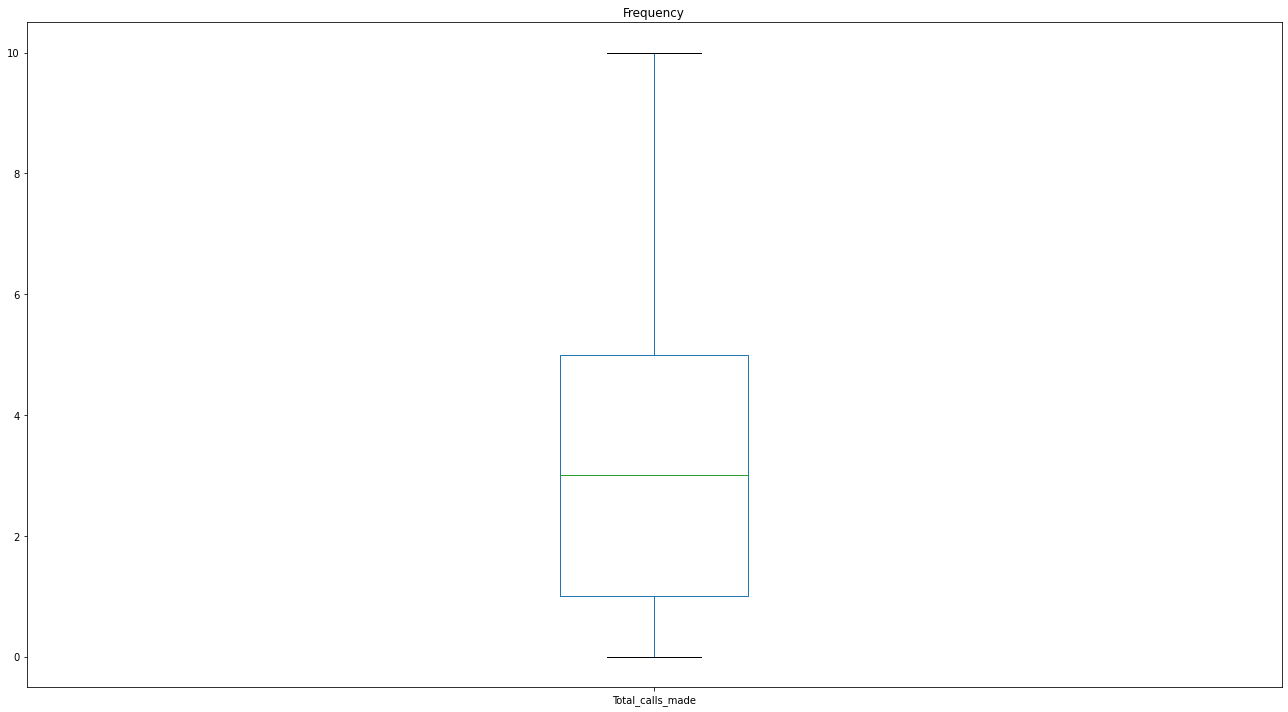

In [156]:
attr=['Avg_Credit_Limit', 'Total_Credit_Cards', 'Total_visits_bank',
       'Total_visits_online', 'Total_calls_made']
for i in attr:
    ax = mydata[i].plot.kde(figsize=(12,9), bw_method=3)
    plt.show()

    mydata[i].plot.box(figsize=(18,10),title='Frequency',legend=True)
    plt.tight_layout()
    plt.show()
    
# This doesn't give much information , 
# but the pair-plot above gave good insights between the relation b/w each attributes
# E.G. TOTAL VISIT ONLINE vs total calls made shows 4 clusters clearly
# bank visit and calls  made also shows 4 clusters ... so looks like somewhere b/w 3 to 6 are the right number of clusters

Execute K-means clustering use elbow plot and analyse clusters using boxplot (10 marks)

In [157]:
from scipy.spatial.distance import cdist
clusters=range(1,10)
meanDistortions=[]
##Scale the data
from scipy.stats import zscore

mydata_z = mydata.apply(zscore)



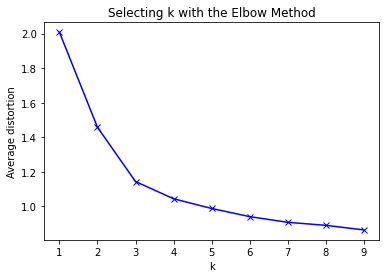

In [158]:
for k in clusters:
    model=KMeans(n_clusters=k)
    model.fit(mydata_z)
    prediction=model.predict(mydata_z)
    meanDistortions.append(sum(np.min(cdist(mydata_z, model.cluster_centers_, 'euclidean'), axis=1)) / mydata_z
                           .shape[0])

#     print(cluster, meanDistortions)
plt.plot(clusters, meanDistortions, 'bx-')
plt.xlabel('k')
plt.ylabel('Average distortion')
plt.title('Selecting k with the Elbow Method')
plt.show()

# # sharp fall at 3
# 6 also ok-as there is a decent fall

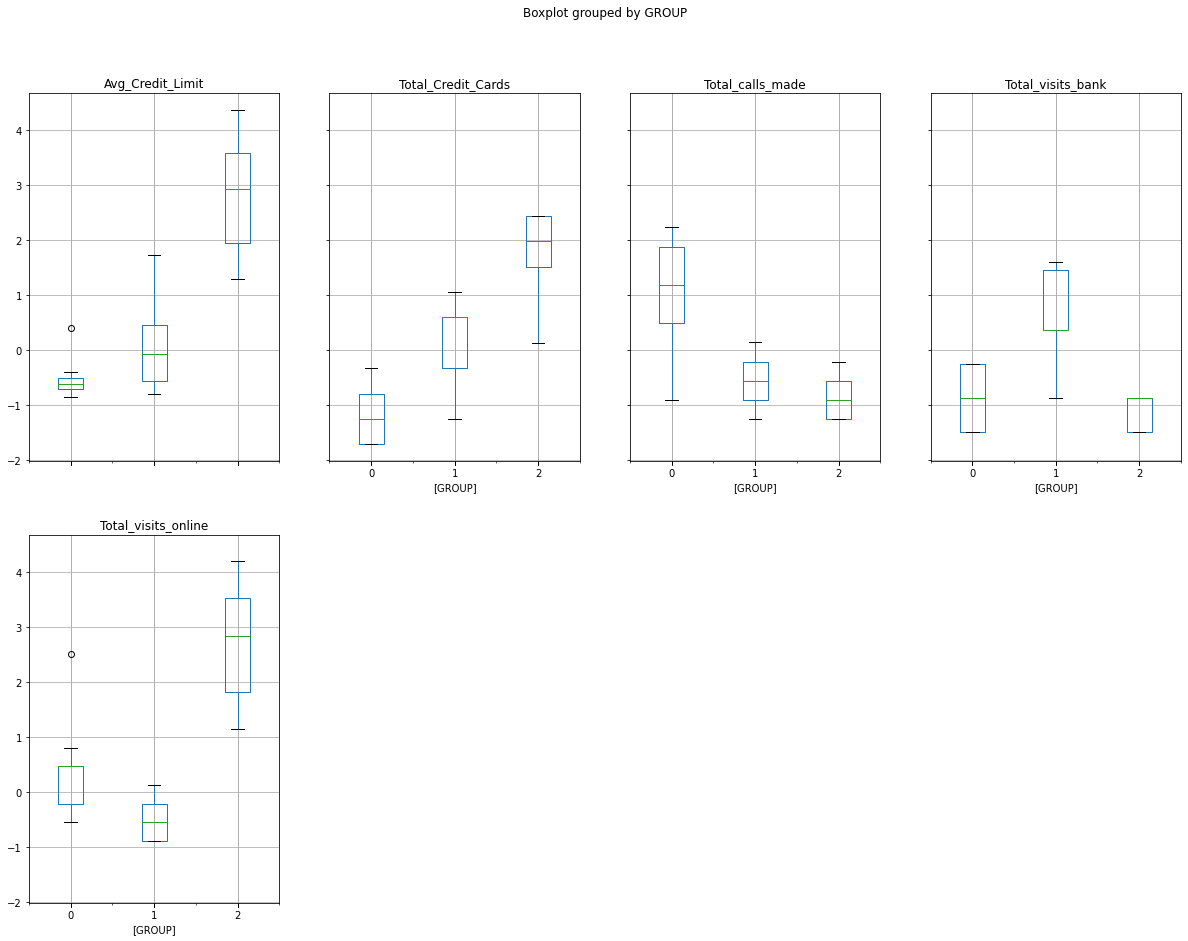

In [135]:
# # # Let us try with K = 3 (to demonstrate the 3d plot)
final_model=KMeans(3)
final_model.fit(mydata_z)
prediction=final_model.predict(mydata_z)
#
# #Append the prediction
mydata_z['GROUP'] = prediction
mydata_z.boxplot(by = 'GROUP',  layout=(2,4), figsize=(20, 15))
plt.show()


# each attribute is clearly seperated in each group

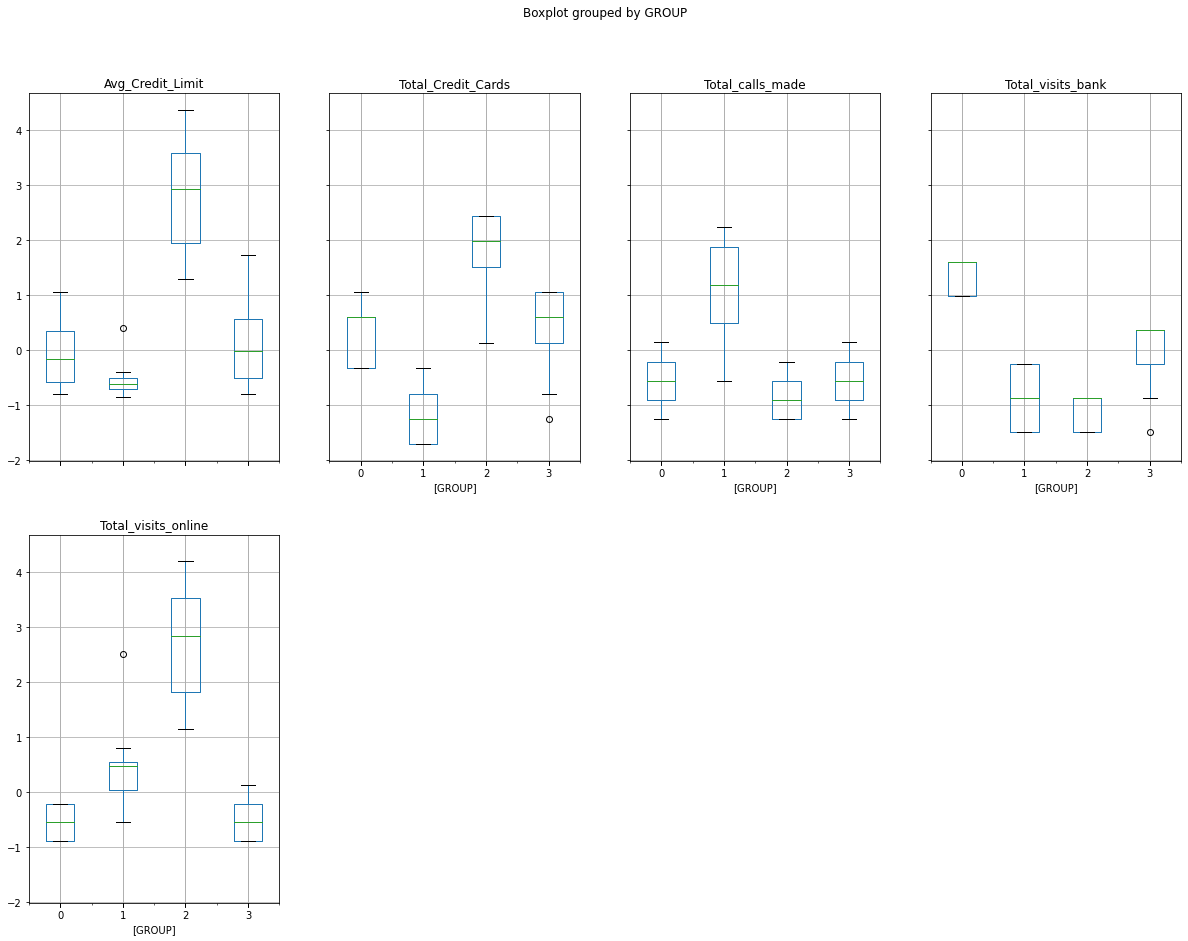

In [136]:
# # # Let us try with K = 4 (to demonstrate the 3d plot)
final_model=KMeans(4)
final_model.fit(mydata_z)
prediction=final_model.predict(mydata_z)
#
# #Append the prediction
mydata_z['GROUP'] = prediction
mydata_z.boxplot(by = 'GROUP',  layout=(2,4), figsize=(20, 15))
plt.show()


# each attribute is clearly seperated in each group and gives us a pretty good understanding

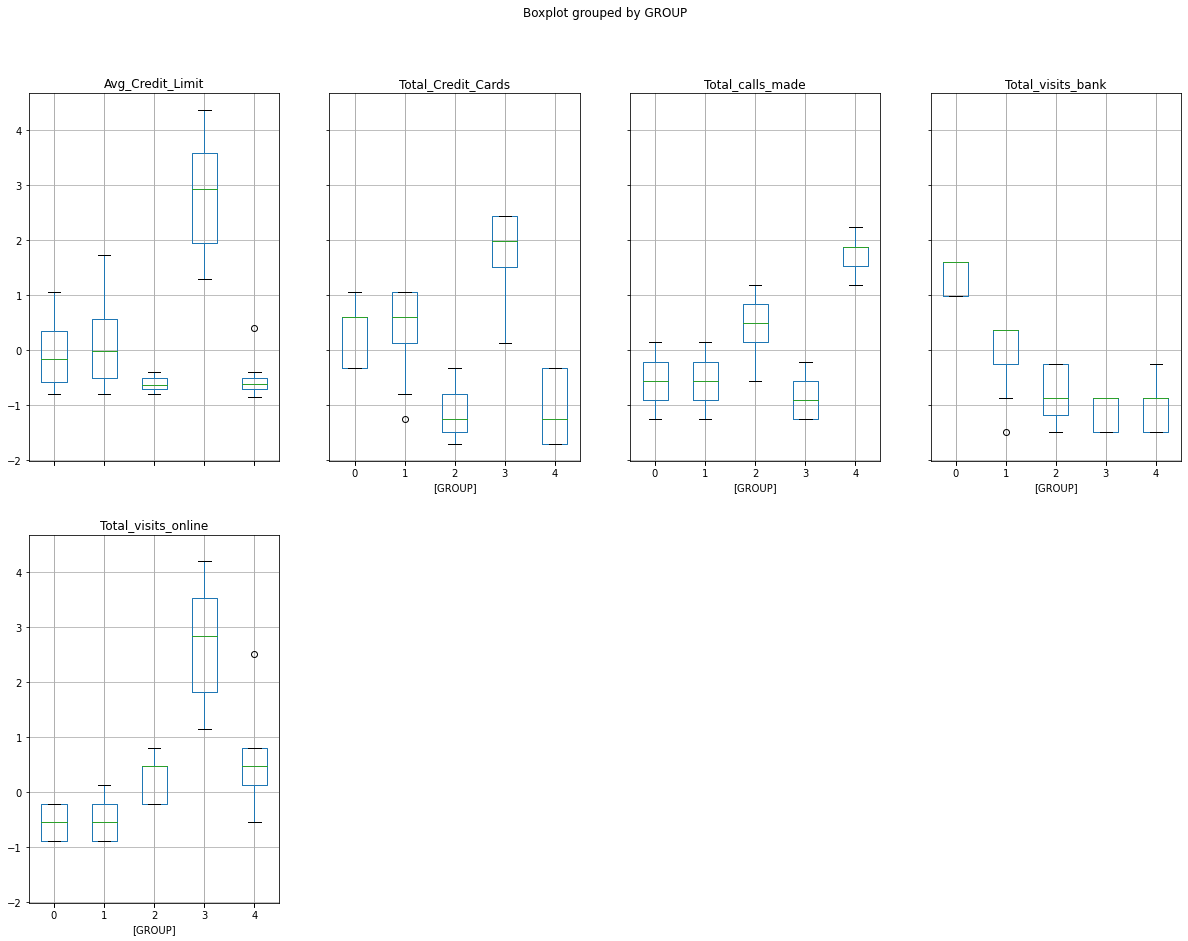

In [137]:
# # # Let us try with K = 5 (to demonstrate the 3d plot)
final_model=KMeans(5)
final_model.fit(mydata_z)
prediction=final_model.predict(mydata_z)
#
# #Append the prediction
mydata_z['GROUP'] = prediction
mydata_z.boxplot(by = 'GROUP',  layout=(2,4), figsize=(20, 15))
plt.show()


# each attribute is clearly seperated in each group, though 3 and 5 shows some common behaviour

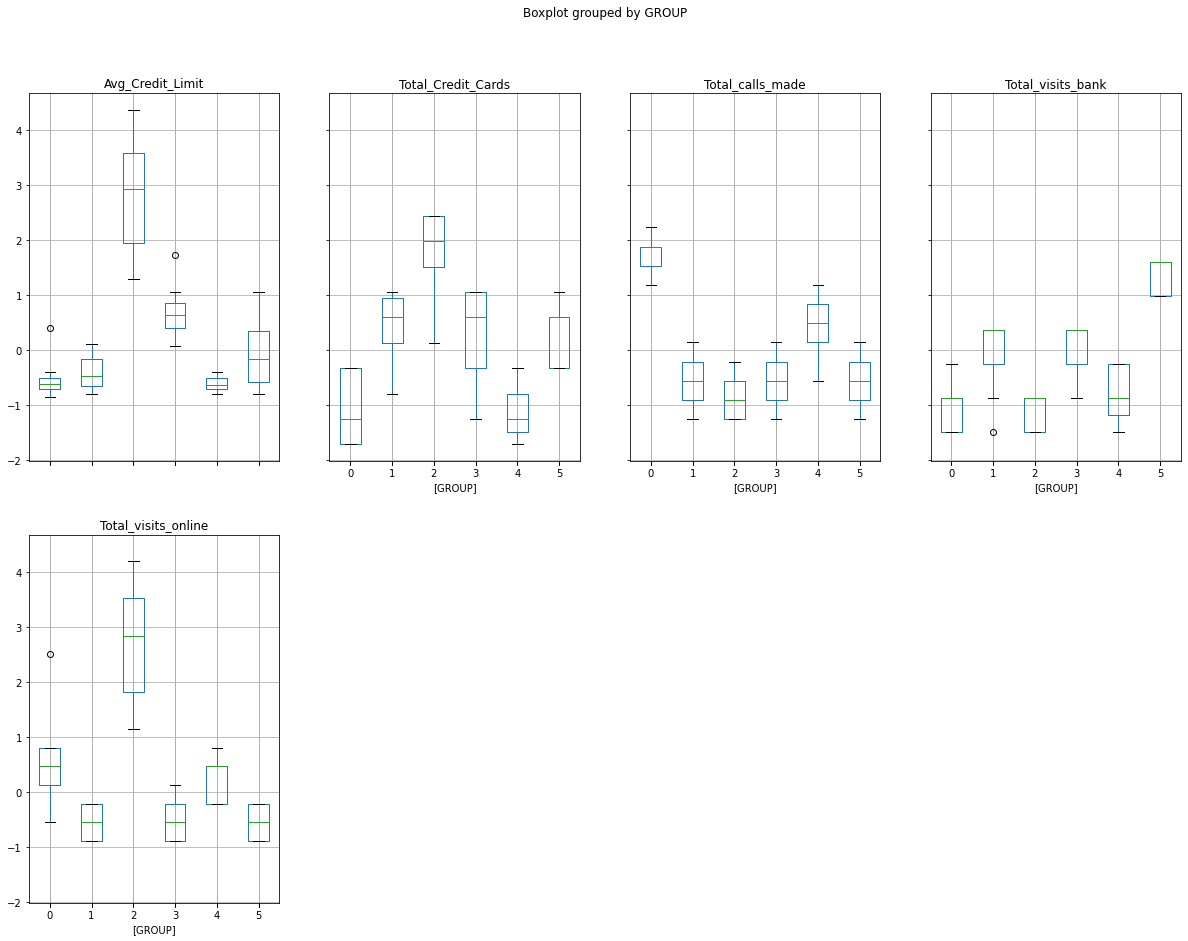

In [138]:

# # # Let us try with K = 6 (to demonstrate the 3d plot)
final_model=KMeans(6)
final_model.fit(mydata_z)
prediction=final_model.predict(mydata_z)

#Append the prediction
mydata_z["GROUP"] = prediction
mydata_z.boxplot(by = 'GROUP',  layout=(2,4), figsize=(20, 15))
plt.show()

# there is some overlapping in the behaviour- but this also segments the customer properly into 6 groups.
# group 0 and 1 shows similar behaviour except bank visits.
# group 2 and 4 are also showing some attributes common
# I guess going beyond 6 clusters doesn't make sense

Execute hierarchical clustering (with different linkages) with the help of dendrogram and cophenetic coeff. Analyse clusters formed using boxplot (15 marks)


(648, 4)
cophenetic coeff is 0.7960487552147687  for the linkage  single


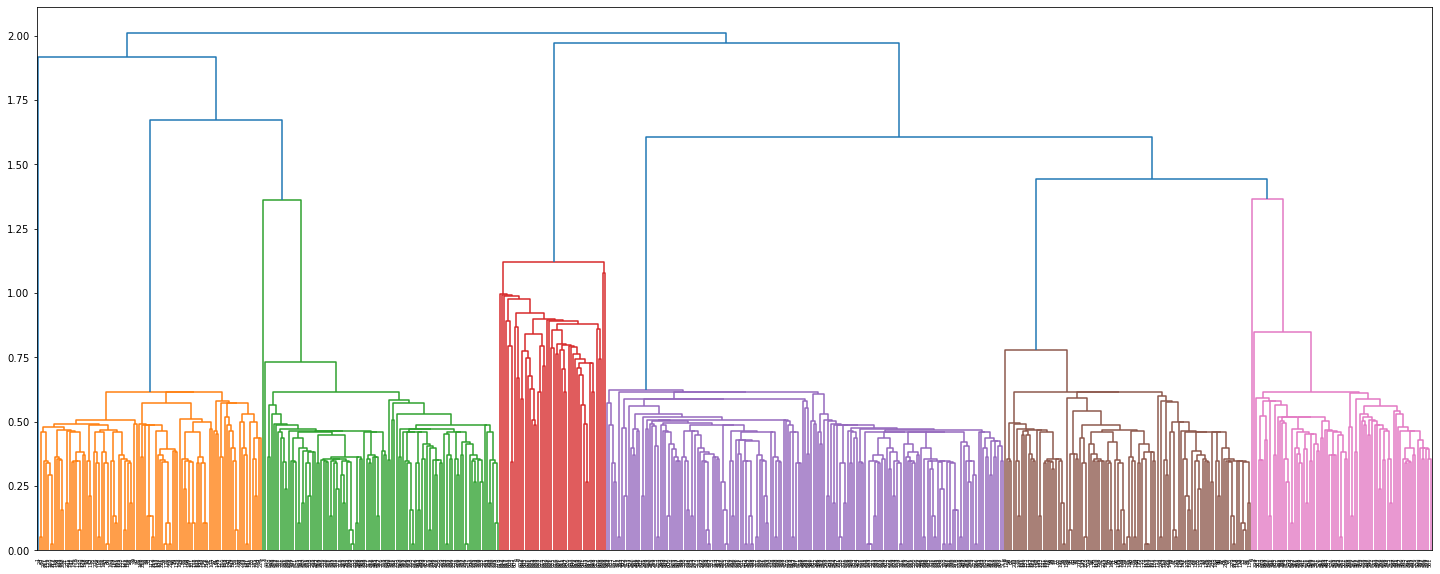

(648, 4)
cophenetic coeff is 0.8593430662870395  for the linkage  complete


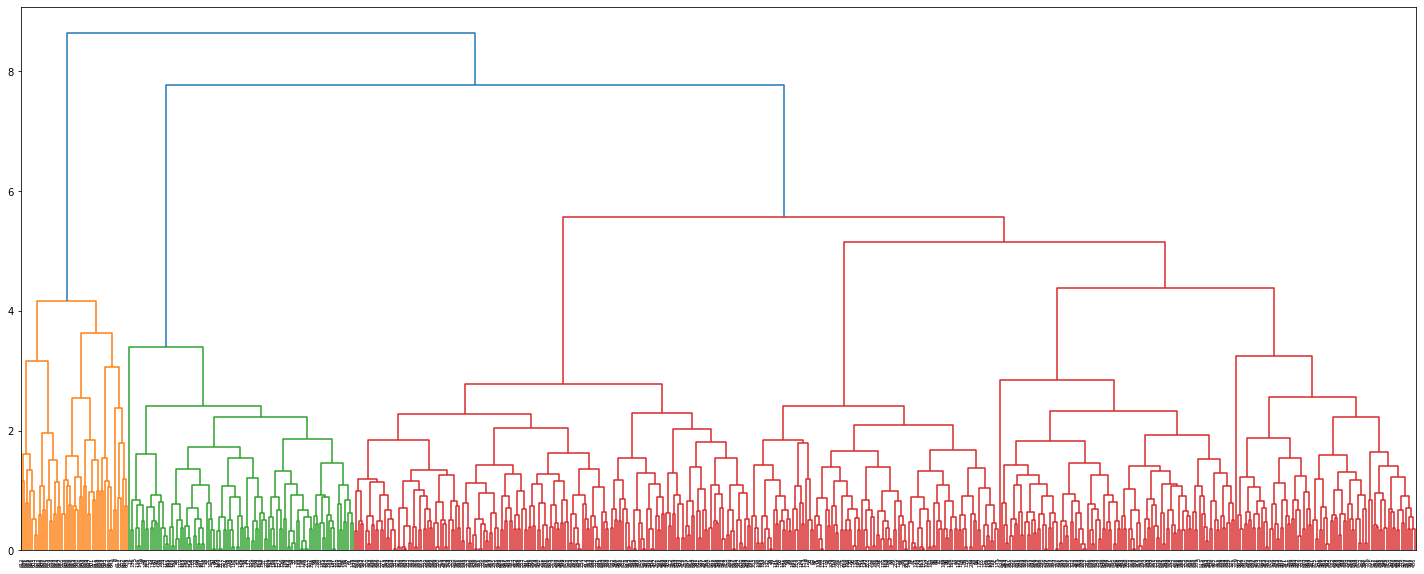

(648, 4)
cophenetic coeff is 0.8639900189414892  for the linkage  average


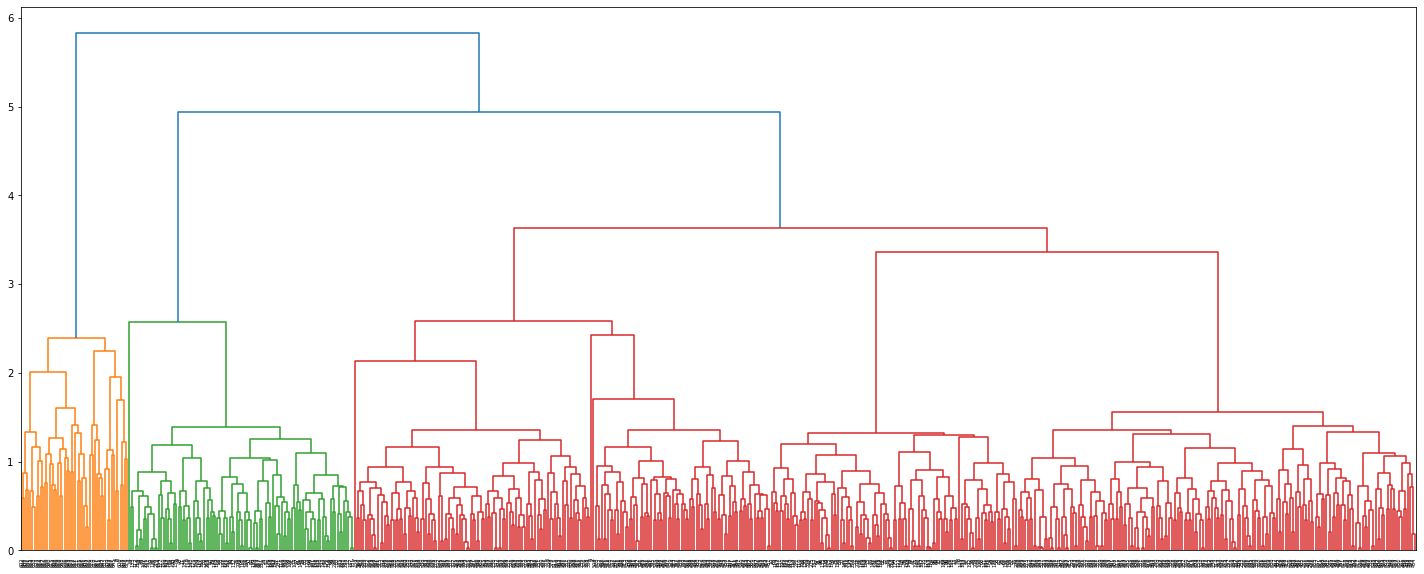

(648, 4)
cophenetic coeff is 0.857521077456181  for the linkage  centroid


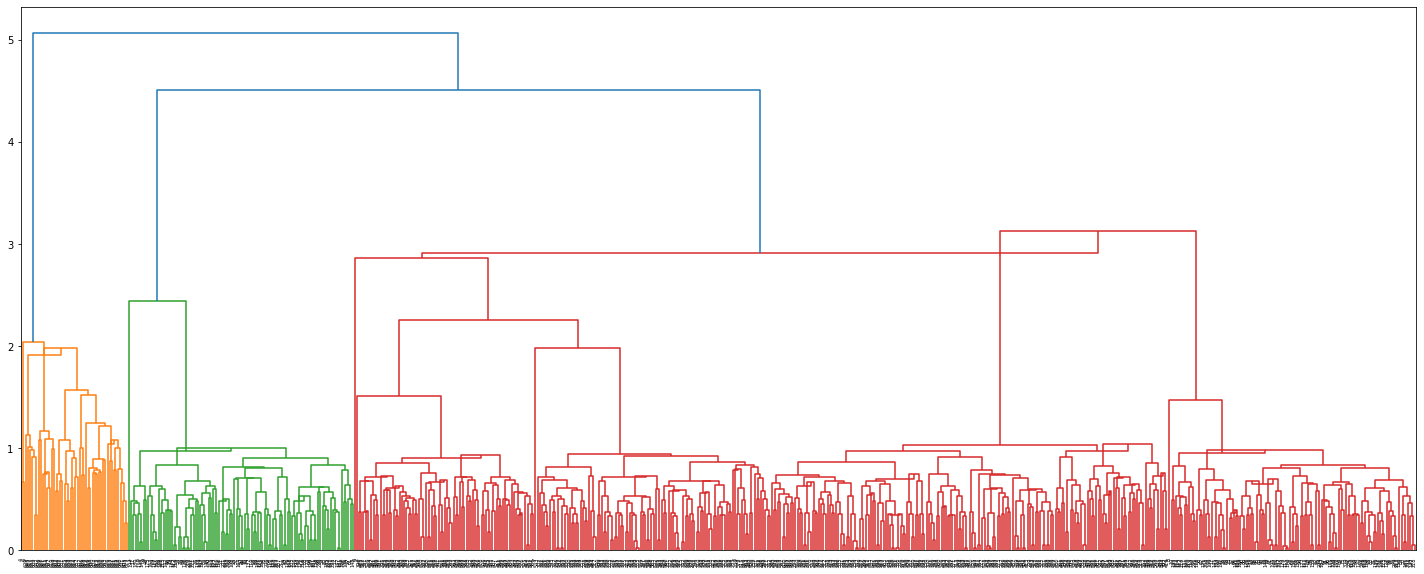

(648, 4)
cophenetic coeff is 0.8288871329368583  for the linkage  median


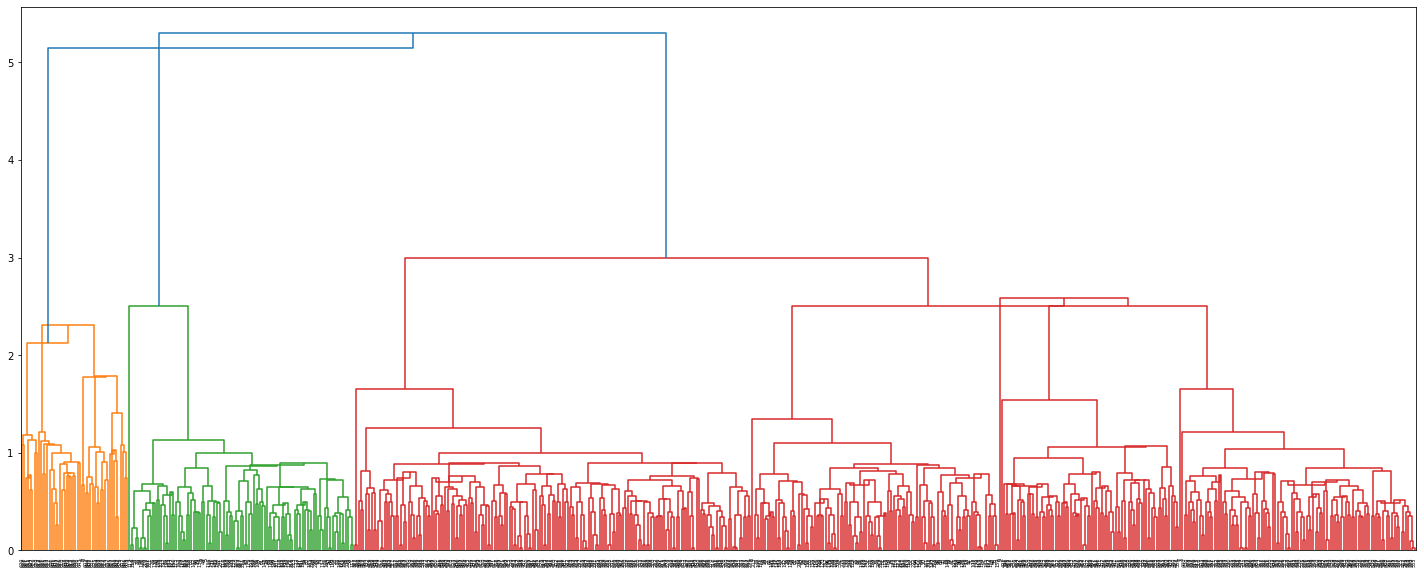

(648, 4)
cophenetic coeff is 0.7230906486203321  for the linkage  ward


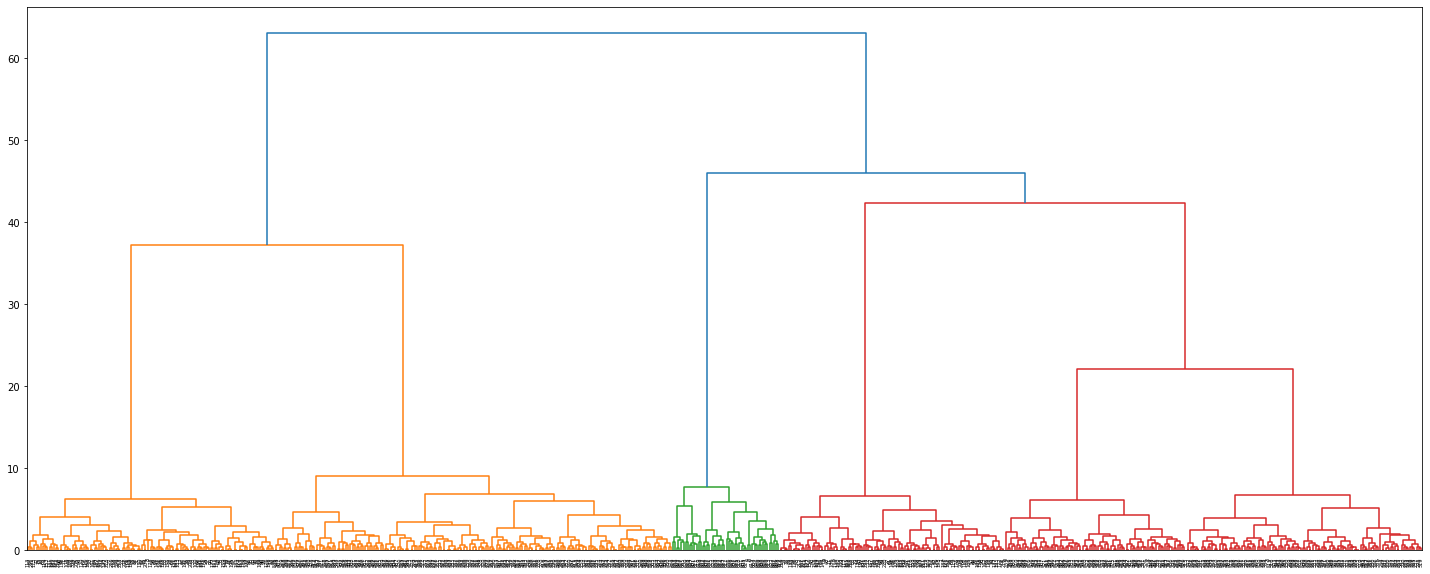

(648, 4)
cophenetic coeff is 0.8361971300990528  for the linkage  weighted


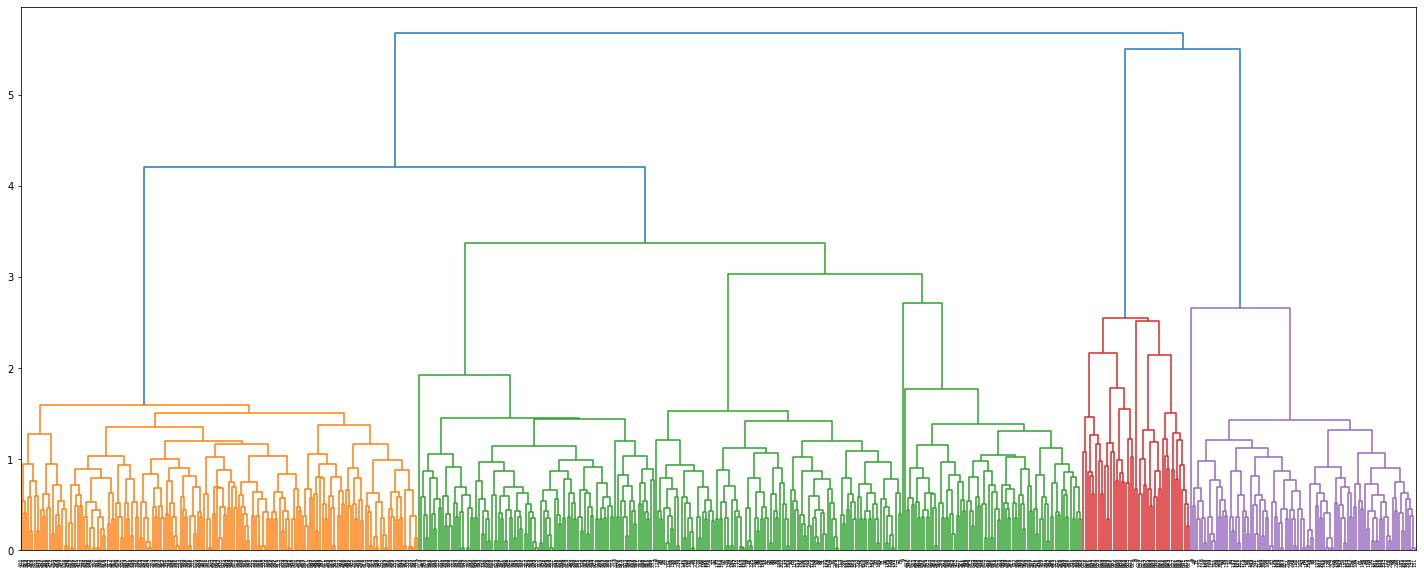

In [139]:
#### generate the linkage matrix
# https://online.stat.psu.edu/stat505/lesson/14/14.4
from scipy.cluster.hierarchy import dendrogram, linkage, cophenet
from scipy.spatial.distance import pdist  #Pairwise distribution between data points

LINKAGE_METHODS = ['single', 'complete', 'average', 'centroid',
                    'median', 'ward', 'weighted']
for linkage_method in LINKAGE_METHODS:
    Z = linkage(mydata_z, method=linkage_method, metric='euclidean')
    print(Z.shape)

    # cophenet index is a measure of the correlation between the distance of points in feature space and distance on dendrogram
    # closer it is to 1, the better is the clustering
    c, coph_dists = cophenet(Z, pdist(mydata_z))
    print('cophenetic coeff is',c, ' for the linkage ', linkage_method)

    plt.figure(figsize=(25, 10))
    dendrogram(Z)
    plt.show()

#     cophenetic coeff is 0.7981277102952005  for the linkage  single
#     cophenetic coeff is 0.8865026291487853  for the linkage  complete
#     cophenetic coeff is 0.9047668489974608  for the linkage  average
#     cophenetic coeff is 0.9035520485000272  for the linkage  centroid
#     cophenetic coeff is 0.8939622567369487  for the linkage  median
#     cophenetic coeff is 0.7997106701758531  for the linkage  ward
#     cophenetic coeff is 0.8725421993611414  for the linkage  weighted

# We see that complete, centroid, median and average linkages are performing good. 

AgglomerativeClustering(linkage='complete', n_clusters=3)


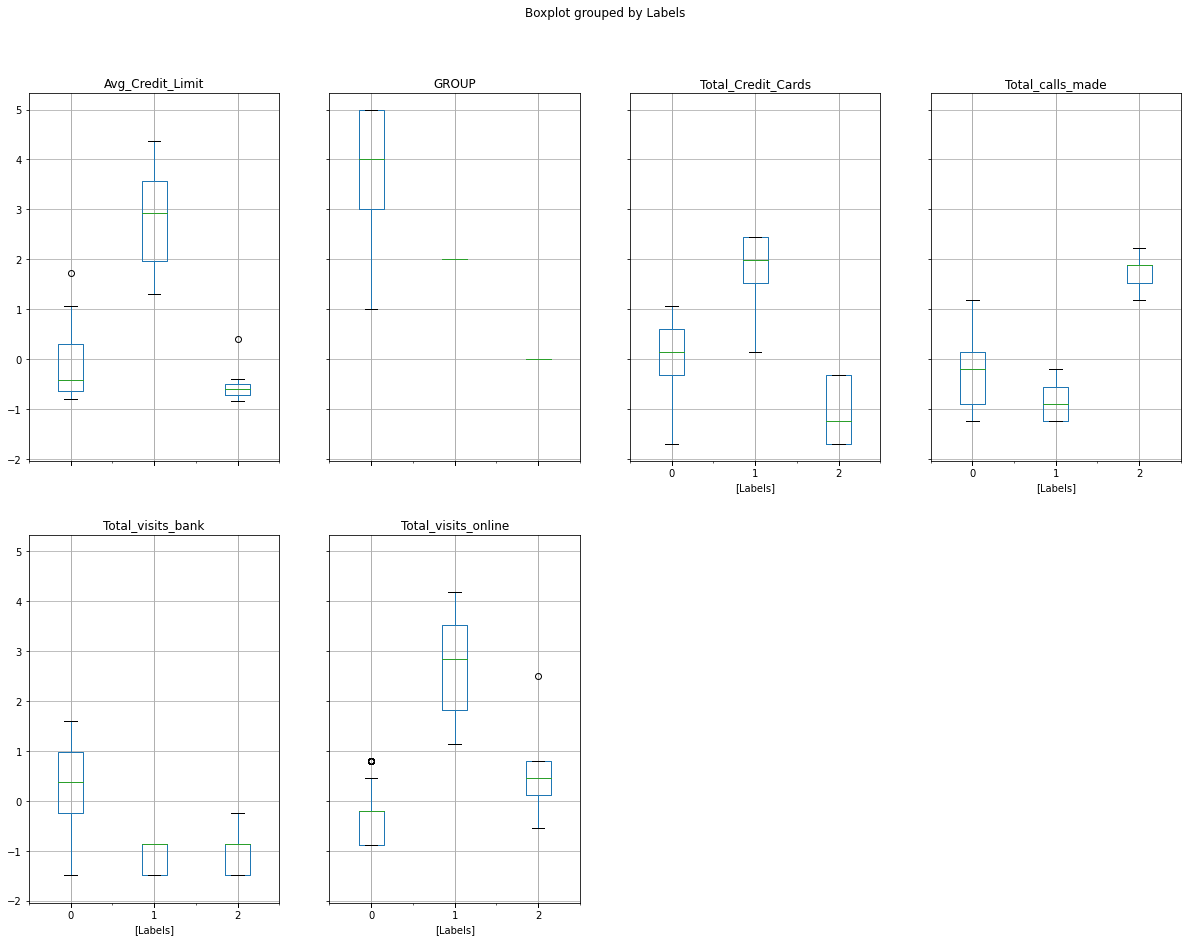

0    494
2    105
1     50
Name: Labels, dtype: int64
AgglomerativeClustering(linkage='average', n_clusters=3)


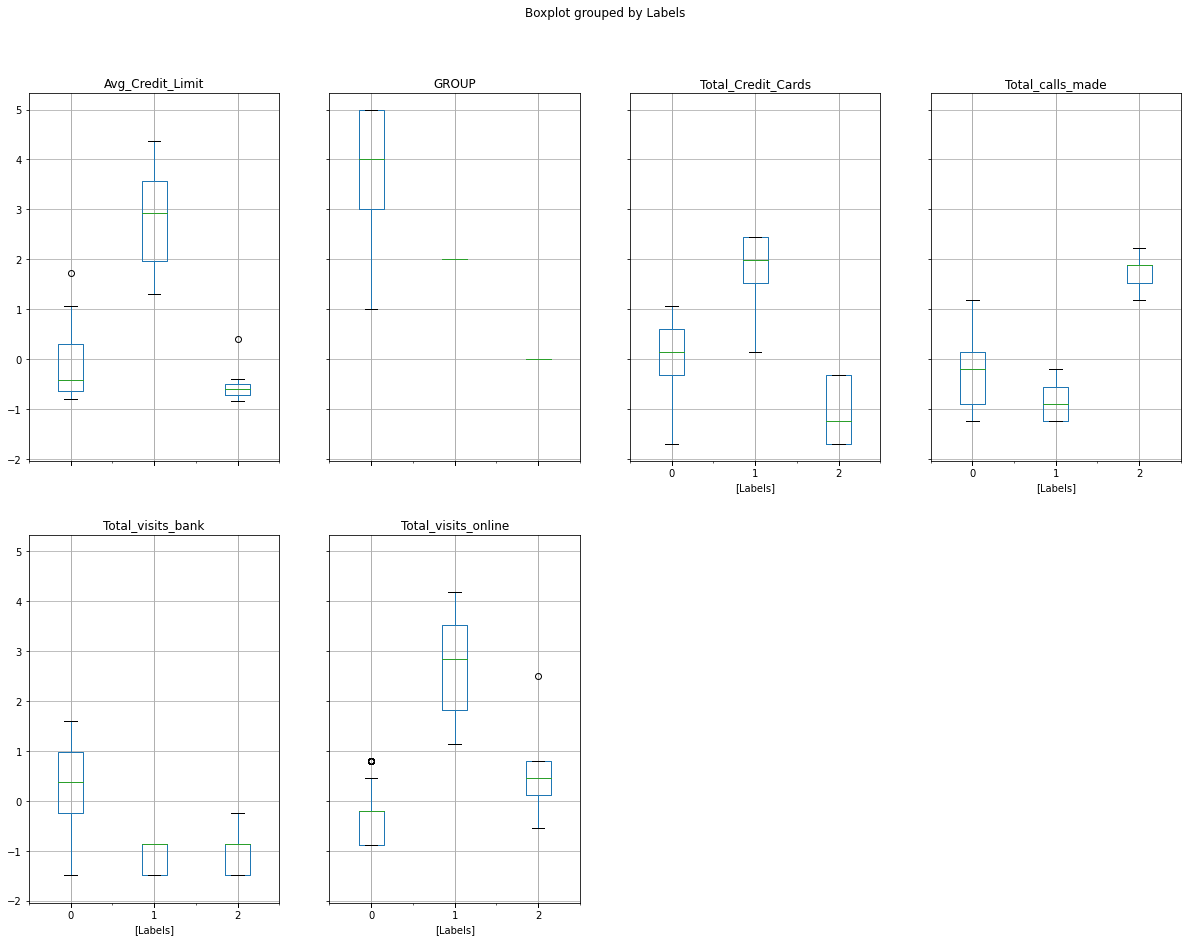

0    494
2    105
1     50
Name: Labels, dtype: int64
AgglomerativeClustering(linkage='complete', n_clusters=4)


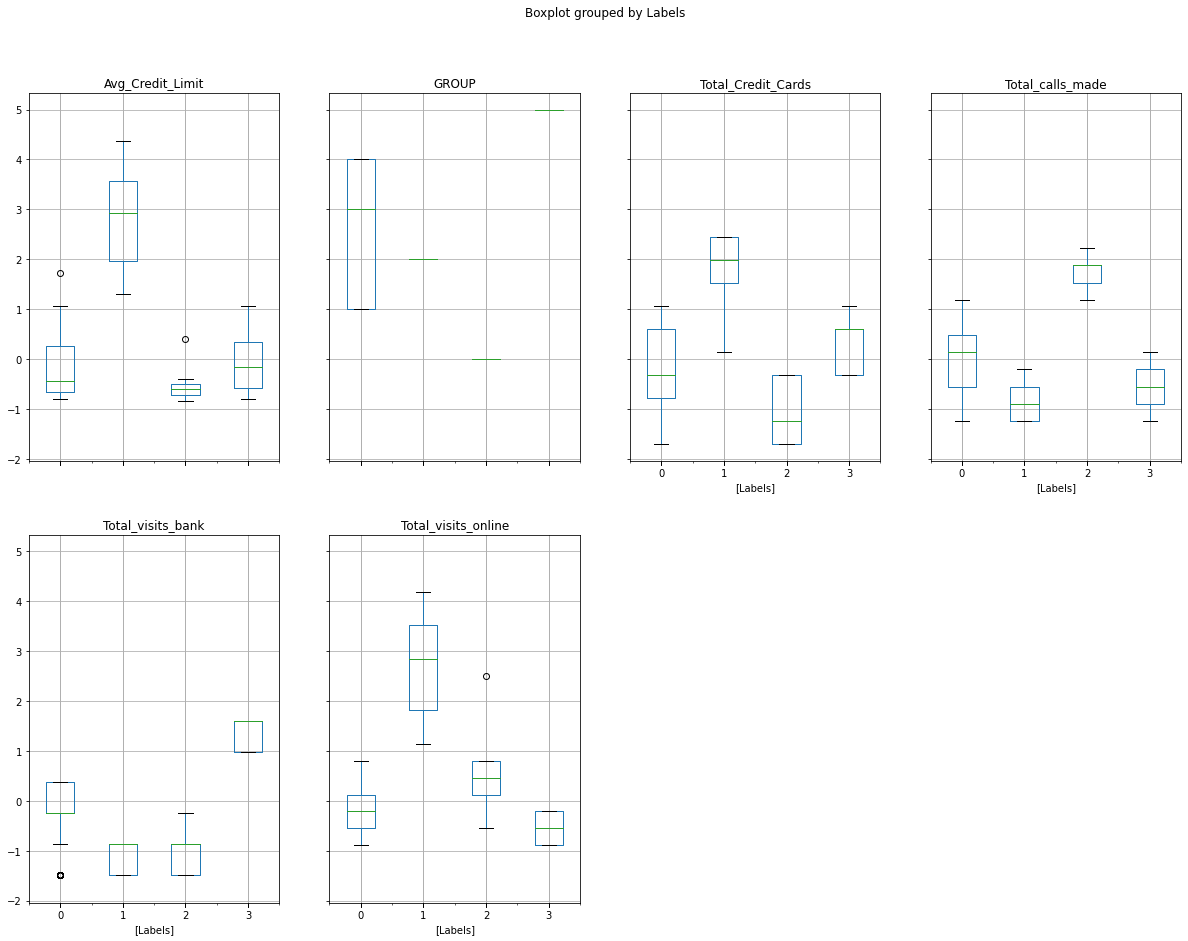

0    309
3    185
2    105
1     50
Name: Labels, dtype: int64
AgglomerativeClustering(linkage='average', n_clusters=4)


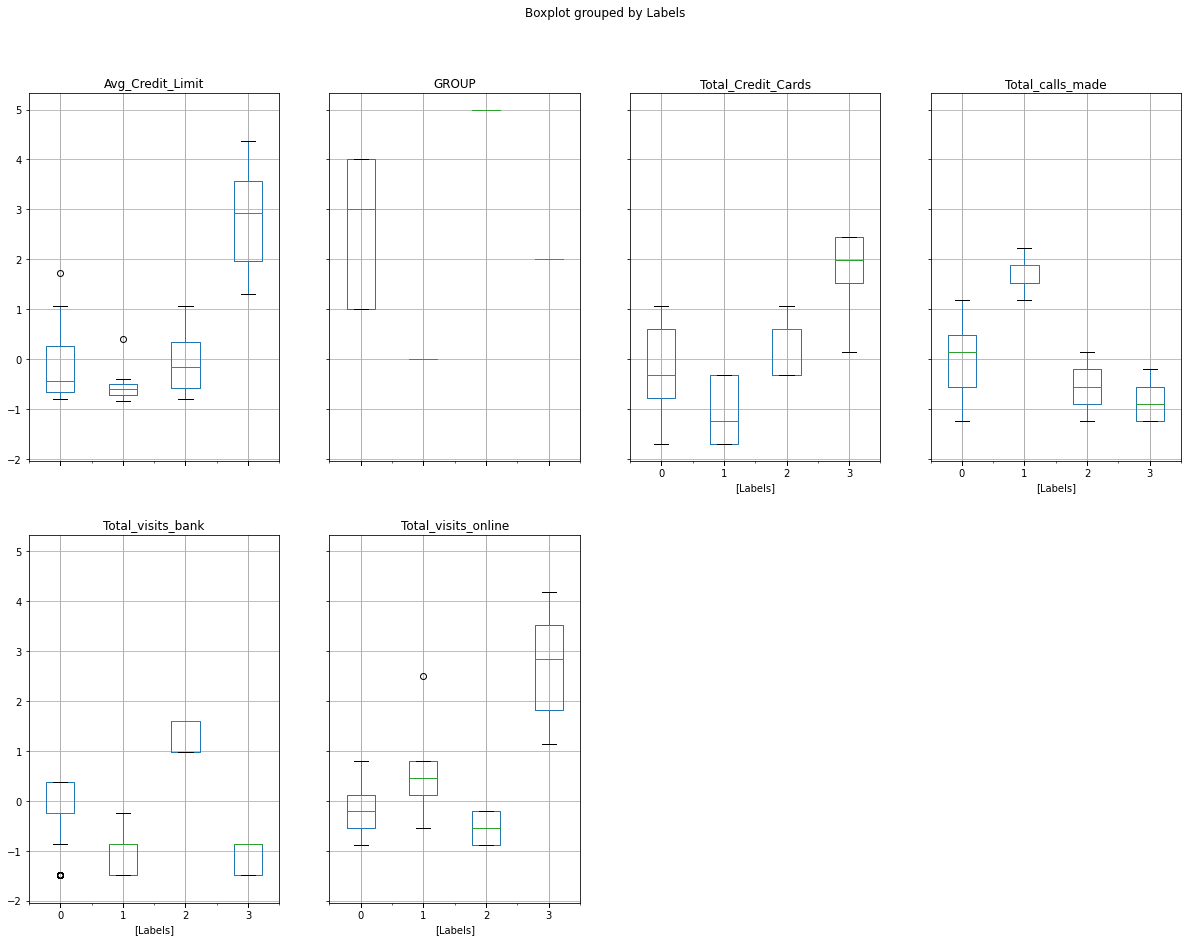

0    309
2    185
1    105
3     50
Name: Labels, dtype: int64
AgglomerativeClustering(linkage='complete', n_clusters=5)


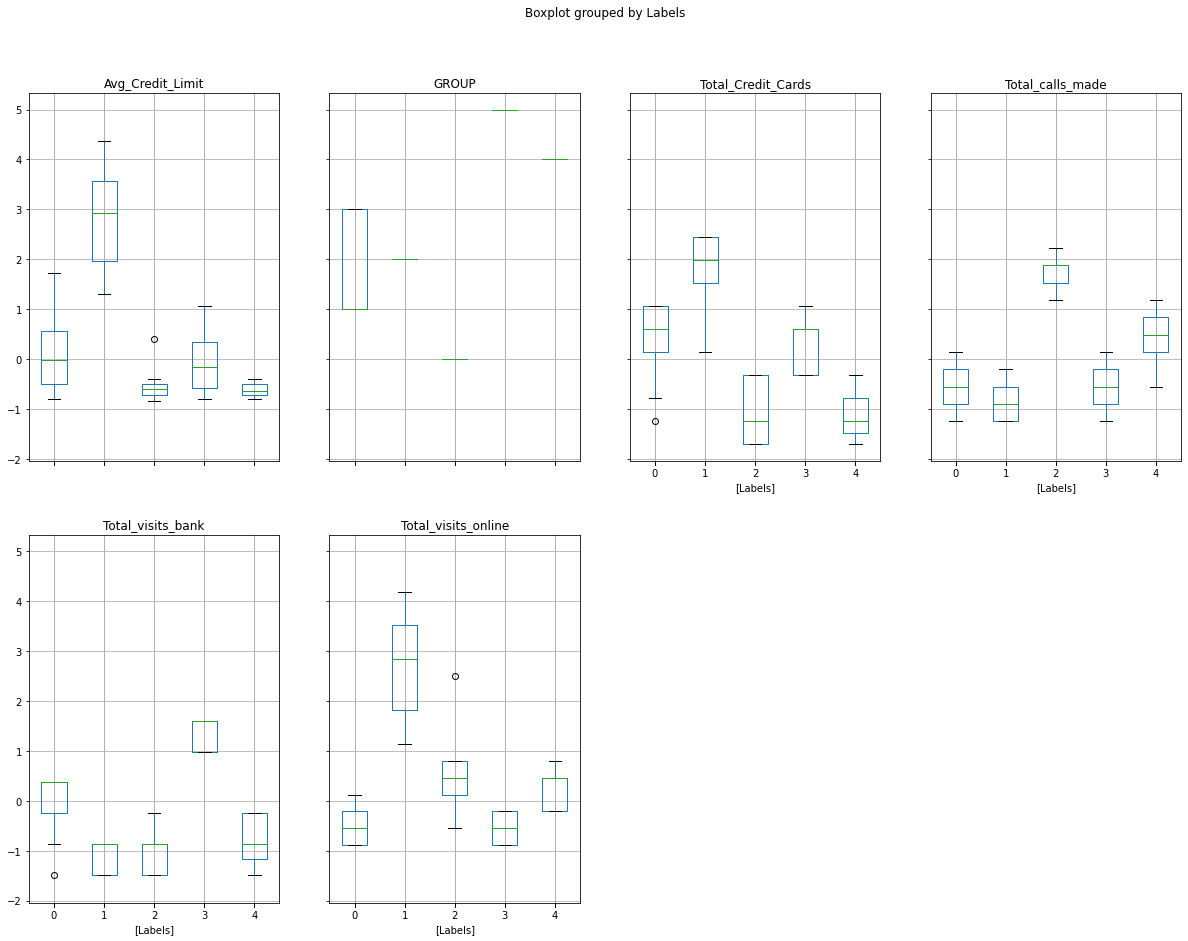

0    194
3    185
4    115
2    105
1     50
Name: Labels, dtype: int64
AgglomerativeClustering(linkage='average', n_clusters=5)


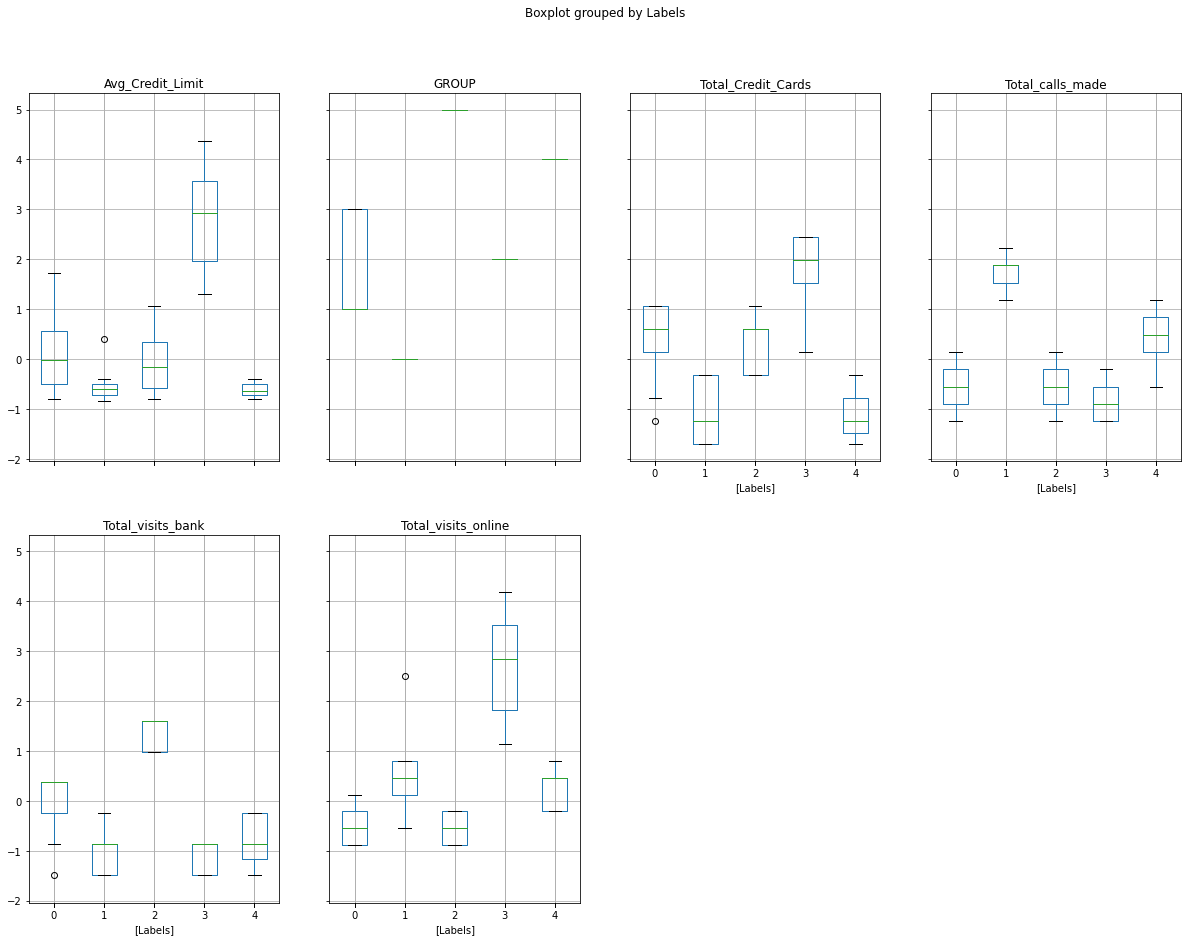

0    194
2    185
4    115
1    105
3     50
Name: Labels, dtype: int64
AgglomerativeClustering(linkage='complete', n_clusters=6)


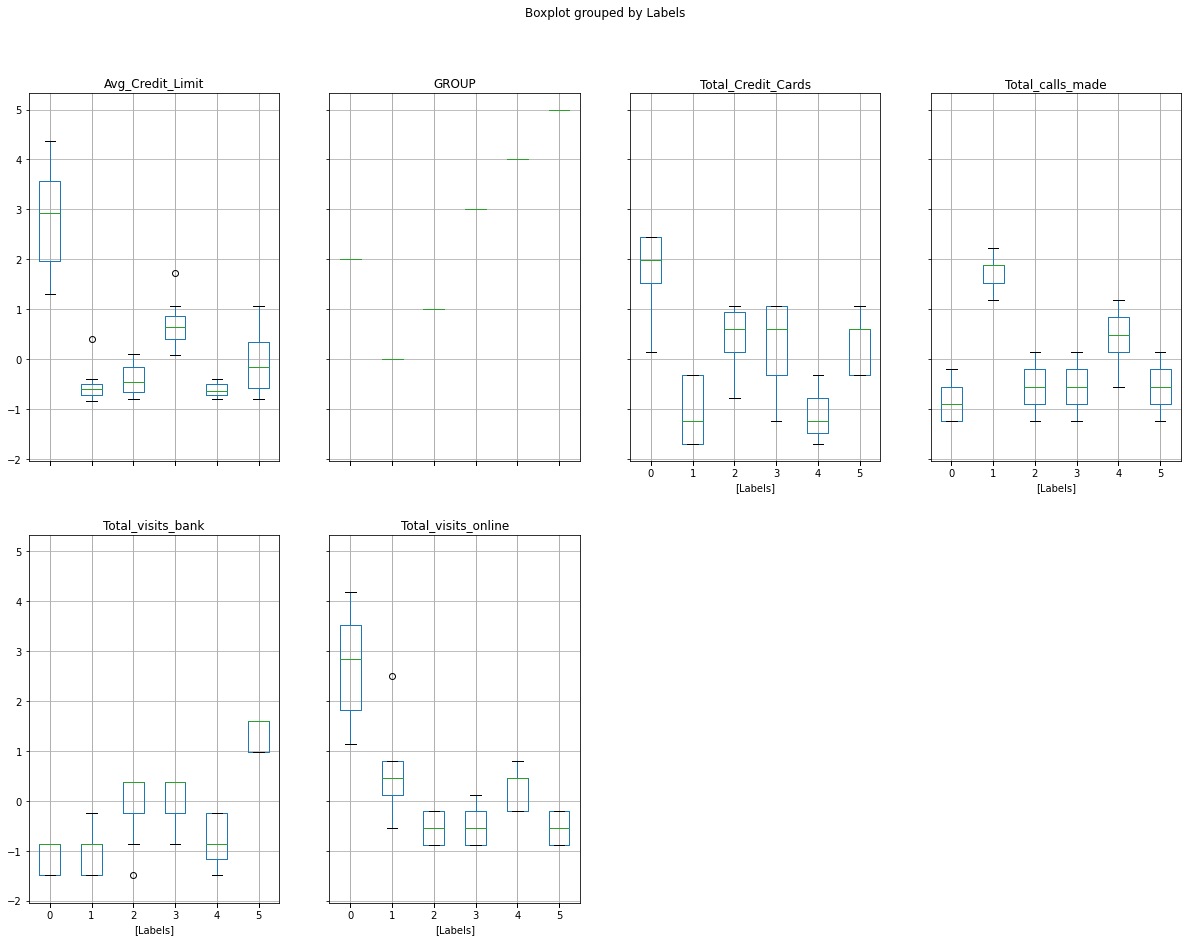

5    185
4    115
2    110
1    105
3     84
0     50
Name: Labels, dtype: int64
AgglomerativeClustering(linkage='average', n_clusters=6)


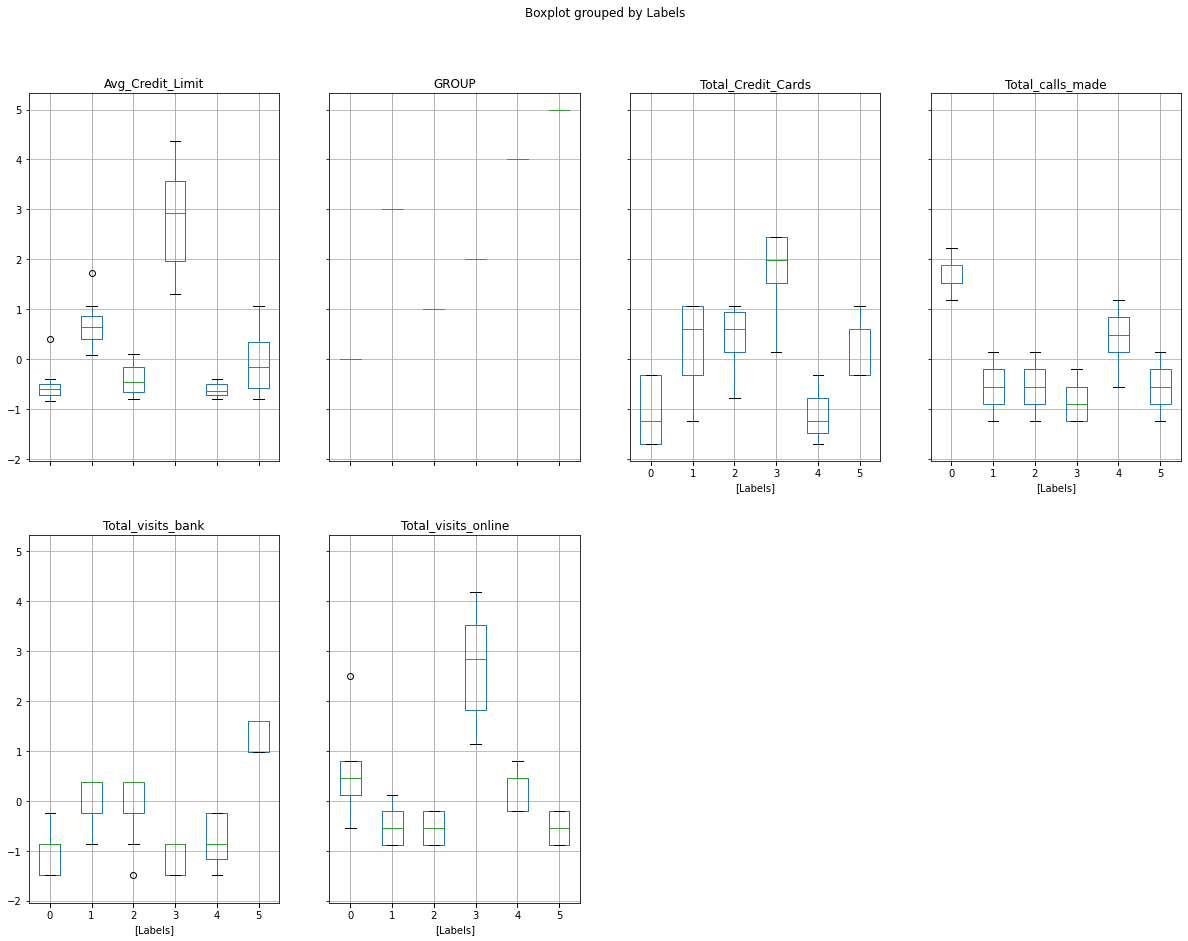

5    185
4    115
2    110
0    105
1     84
3     50
Name: Labels, dtype: int64


In [140]:

# create the box-plot using 3-6 clusters with complete and average
# as single and ward didnt have good cophenetic coeff score in the above section
# mydata.drop(['GROUP'], axis=1, inplace=True)
from sklearn.cluster import AgglomerativeClustering
for cluster in range(3, 7):
    for linkage_method in ['complete', 'average']:
        agglomerative = AgglomerativeClustering(linkage=linkage_method, affinity='euclidean',
                                                n_clusters=cluster)
        agglomerative.fit_predict(mydata_z)

        print(agglomerative)


        # Append the prediction
        mydata_z["Labels"] = agglomerative.labels_
        mydata_z.boxplot(by='Labels', layout=(2, 4), figsize=(20, 15))
        plt.show()
        print(mydata_z['Labels'].value_counts())
        

        
        
# AgglomerativeClustering(linkage='complete', n_clusters=3)
# 2    393
# 0    206
# 1     50

# AgglomerativeClustering(linkage='average', n_clusters=3)
# 0    496
# 2    103
# 1     50

# AgglomerativeClustering(linkage='complete', n_clusters=4) & AgglomerativeClustering(linkage='average', n_clusters=4)
# 3    275
# 0    221
# 2    103
# 1     50

# AgglomerativeClustering(linkage='complete', n_clusters=5) & AgglomerativeClustering(linkage='average', n_clusters=5)
# 3    275
# 4    118
# 2    103
# 1    103
# 0     50

# AgglomerativeClustering(linkage='complete', n_clusters=6) & AgglomerativeClustering(linkage='average', n_clusters=6)
# 3    275
# 4    118
# 2    103
# 1    103
# 0     31
# 5     19
# Based on silhouette score we will pick up the best no. of clusters

# # As of now we see mainly 3 types of groups
# # Group 0: avg_credit_limit , avg_credit_card moderate, calls made and online visit low, total visit to bank - pretty high.
# # seems they are using cards pretty decent amount and visiting branches too often but not great in online. so this could be the elderly citizen
#
# # Group 1: avg_credit_limit , avg_credit_card very high, calls made and bank visit low but online visit extremely high.
# # they seem to be very active in purchase and the working class of the society.
#
# # Group 2: avg_credit_limit , avg_credit_card low,calls made high, total visit to bank and online visit moderate : seems these customers are actually not using card
# # but more interested in knowing the offers. They are still deciding stage. could be students or not having high earnings

Calculate average silhouette score for both methods. (5 marks)

In [162]:

# calculating for k-means with 3 to 6 clusters
from sklearn.metrics import silhouette_score
silhouette_list_kmeans=[]
for k in range(3, 7):
    model=KMeans(n_clusters=k, random_state=10).fit_predict(mydata_z)
    sil_score = metrics.silhouette_score(mydata_z, model, metric='euclidean')
    silhouette_list_kmeans.append((k, sil_score,  len(set(model))))

df_kmeans = pd.DataFrame(silhouette_list_kmeans,
                               columns=['cluster', 'sil_score',  'number_of_clusters'])

print(df_kmeans)

#    cluster  sil_score  number_of_clusters
# 0        3   0.498013                   3
# 1        4   0.554007                   4
# 2        5   0.605052                   5
# 3        6   0.615854                   6

# Best with 5 or 6 clusters

   cluster  sil_score  number_of_clusters
0        3   0.516281                   3
1        4   0.357024                   4
2        5   0.273091                   5
3        6   0.256542                   6


In [142]:
# calculating for agglomerative clustering with 3 and 6 clusters based on silhouette score 3 is the best number of cluster


silhouette_list_hierarchical = []

for cluster in range(3, 7):
    for linkage_method in ['complete', 'average']:
        agglomerative = AgglomerativeClustering(linkage=linkage_method, affinity='euclidean',
                                                n_clusters=cluster).fit_predict(mydata_z)
        sil_score = metrics.silhouette_score(mydata_z, agglomerative, metric='euclidean')
        silhouette_list_hierarchical.append((cluster, sil_score, linkage_method, len(set(agglomerative))))

df_hierarchical = pd.DataFrame(silhouette_list_hierarchical,
                               columns=['cluster', 'sil_score', 'linkage_method', 'number_of_clusters'])

print(df_hierarchical)


#    cluster  sil_score linkage_method  number_of_clusters
# 0        3   0.527532       complete                   3
# 1        3   0.527532        average                   3
# 2        4   0.554007       complete                   4
# 3        4   0.554007        average                   4
# 4        5   0.605052       complete                   5
# 5        5   0.605052        average                   5
# 6        6   0.615854       complete                   6
# 7        6   0.615854        average                   6

# Best with cluster=5 or 6
# in both the methods its showing best result with 5 or 6 clusters

   cluster  sil_score linkage_method  number_of_clusters
0        3   0.527532       complete                   3
1        3   0.527532        average                   3
2        4   0.554007       complete                   4
3        4   0.554007        average                   4
4        5   0.605052       complete                   5
5        5   0.605052        average                   5
6        6   0.615854       complete                   6
7        6   0.615854        average                   6


Compare K-means clusters with Hierarchical clusters. (5 marks)

In [38]:
# K-means 

#    cluster  sil_score  number_of_clusters
# 0        3   0.498013                   3
# 1        4   0.554007                   4
# 2        5   0.605052                   5
# 3        6   0.615854                   6

# Hierarchical- Agglomerative

#    cluster  sil_score linkage_method  number_of_clusters
# 0        3   0.527532       complete                   3
# 1        3   0.527532        average                   3
# 2        4   0.554007       complete                   4
# 3        4   0.554007        average                   4
# 4        5   0.605052       complete                   5
# 5        5   0.605052        average                   5
# 6        6   0.615854       complete                   6
# 7        6   0.615854        average                   6

# From the above we see that both K-means and Hierarchical is showing the max. silhuotte score with Cluster=5 or 6

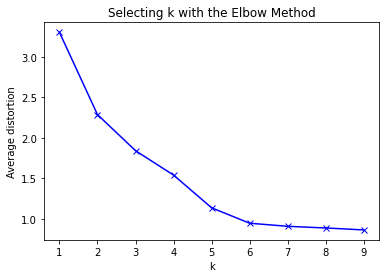

In [143]:
# to confirm the above- we plot the elbow plot again with  k-means and dendogram with Hierarchical
clusters=range(1,10)
meanDistortions=[]
for k in clusters:
    model=KMeans(n_clusters=k)
    model.fit(mydata_z)
    prediction=model.predict(mydata_z)
    meanDistortions.append(sum(np.min(cdist(mydata_z, model.cluster_centers_, 'euclidean'), axis=1)) / mydata_z
                           .shape[0])


plt.plot(clusters, meanDistortions, 'bx-')
plt.xlabel('k')
plt.ylabel('Average distortion')
plt.title('Selecting k with the Elbow Method')
plt.show()

# 5 or 6 seems a good option

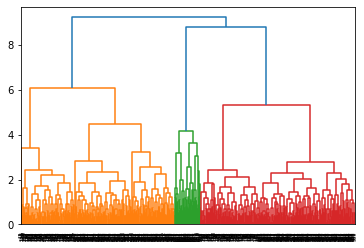

In [144]:

from scipy.cluster import hierarchy
    
dendrogram = hierarchy.dendrogram(hierarchy.linkage(mydata_z, method  = "complete"))

# We look for the largest distance that we can vertically without crossing any horizontal line 

# Let's count the number of lines on the diagram and determine the optimal number of clusters.
# its just above 4 ~4.25, so it shows 6 clusters as well





In [65]:
# if we cut a straight line at y=4.25, we get 6 clusters

Analysis the clusters formed, tell us how is one cluster different from another and answer all the key questions. (10 marks)
How many different segments of customers are there?
How are these segments different from each other?
What are your recommendations to the bank on how to better market to and service these customers?

   Avg_Credit_Limit  Total_Credit_Cards  Total_visits_bank  \
0          1.723499           -1.247087          -0.860606   
1          0.400209           -0.786701          -1.476410   
2          0.400209            1.054846          -0.860606   
3         -0.129107            0.134072          -0.860606   
4          1.723499            0.594459          -1.476410   

   Total_visits_online  Total_calls_made  GROUP  Labels  
0            -0.550407         -1.248443      2       1  
1             2.499808          1.881237      4       0  
2             0.127419          0.142526      2       1  
3            -0.550407          0.142526      2       2  
4             3.177634         -0.205216      1       3  


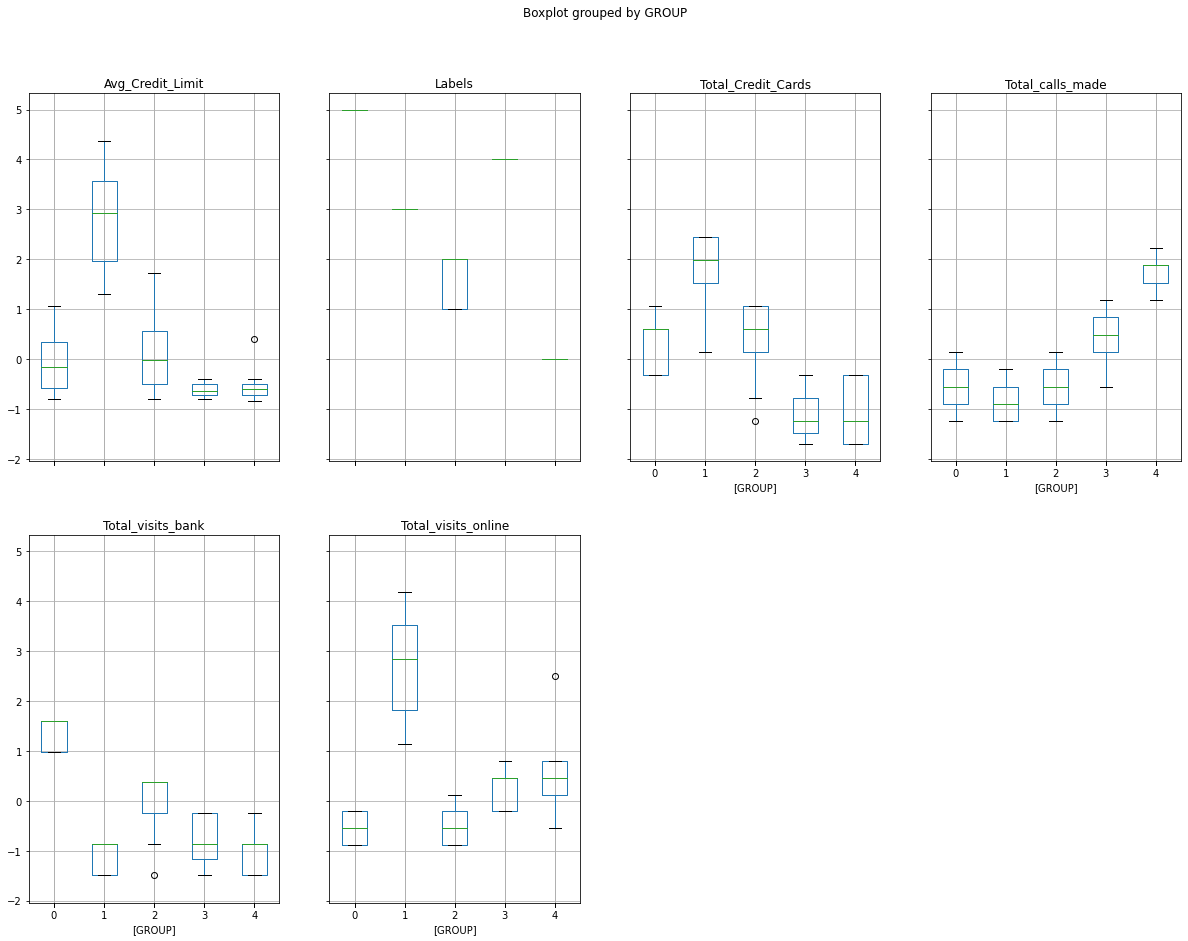

<Figure size 1800x1800 with 0 Axes>

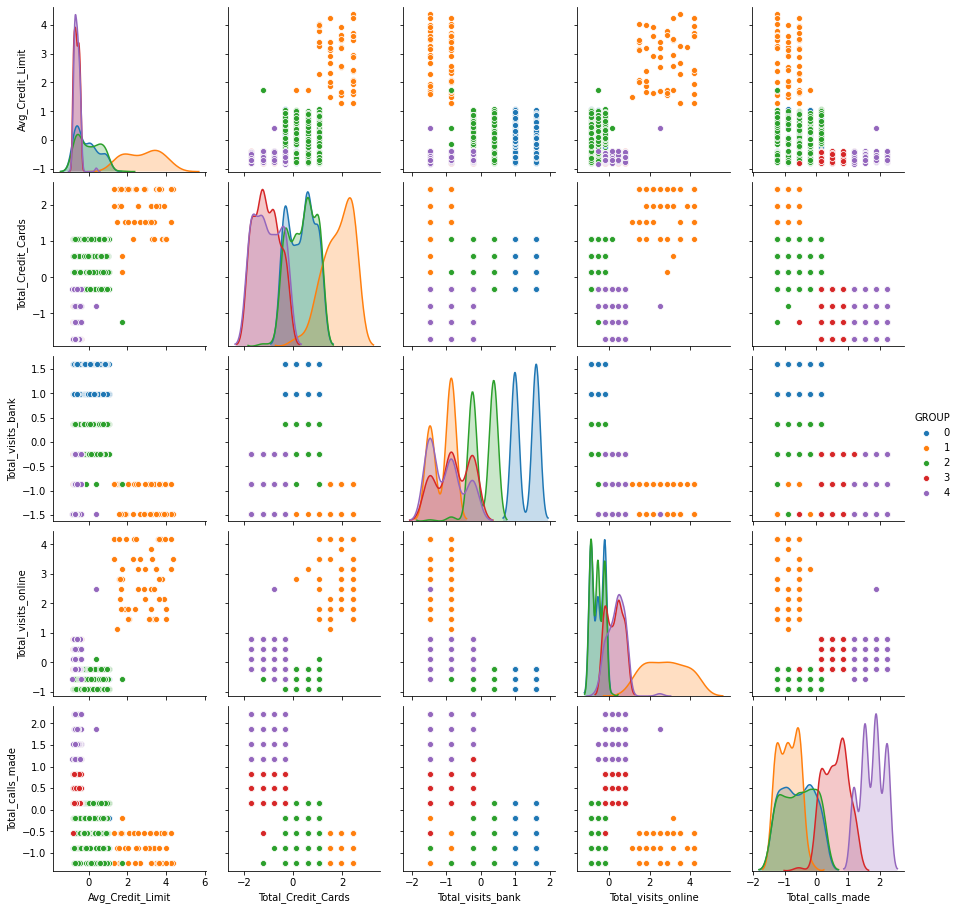

In [145]:
# since both K-means and Hierachical gave the same cluster= 5 or 6 with best results, let's plt
# one more time the box-plot



kmodel=KMeans(5)
kmodel.fit(mydata_z)
prediction=kmodel.predict(mydata_z)

#Append the prediction
mydata_z["GROUP"] = prediction

print(mydata_z.head())

mydata_z.boxplot(by = 'GROUP',  layout=(2,4), figsize=(20, 15))
plt.show()

# pair-plot
columns = ['Avg_Credit_Limit', 'Total_Credit_Cards', 'Total_visits_bank','Total_visits_online', 'Total_calls_made']

columns.append("GROUP")
plt.figure(figsize=(25,25))
sns.pairplot( mydata_z[columns], hue="GROUP")
plt.show()

   Avg_Credit_Limit  Total_Credit_Cards  Total_visits_bank  \
0          1.723499           -1.247087          -0.860606   
1          0.400209           -0.786701          -1.476410   
2          0.400209            1.054846          -0.860606   
3         -0.129107            0.134072          -0.860606   
4          1.723499            0.594459          -1.476410   

   Total_visits_online  Total_calls_made  GROUP  
0            -0.550407         -1.248443      2  
1             2.499808          1.881237      0  
2             0.127419          0.142526      2  
3            -0.550407          0.142526      1  
4             3.177634         -0.205216      3  


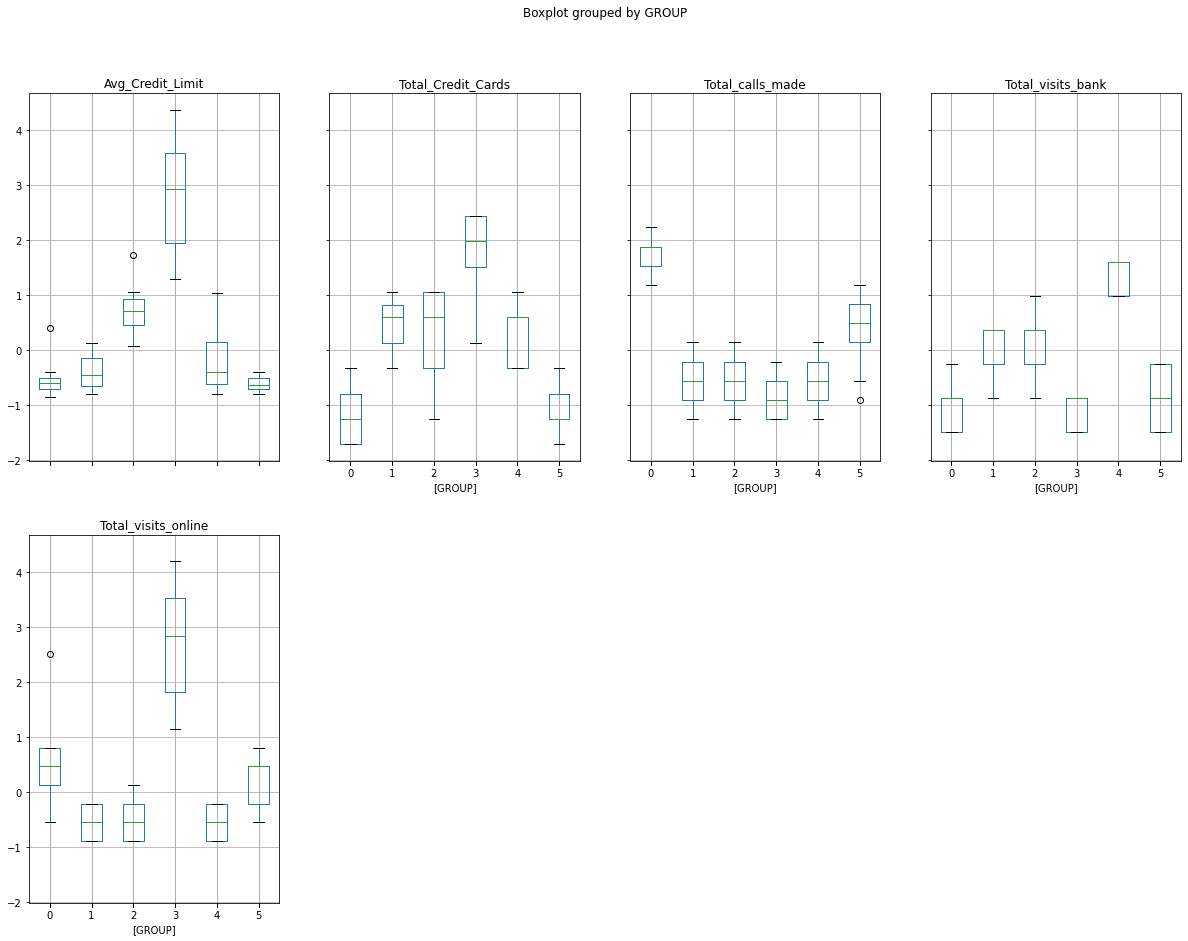

<Figure size 1800x1800 with 0 Axes>

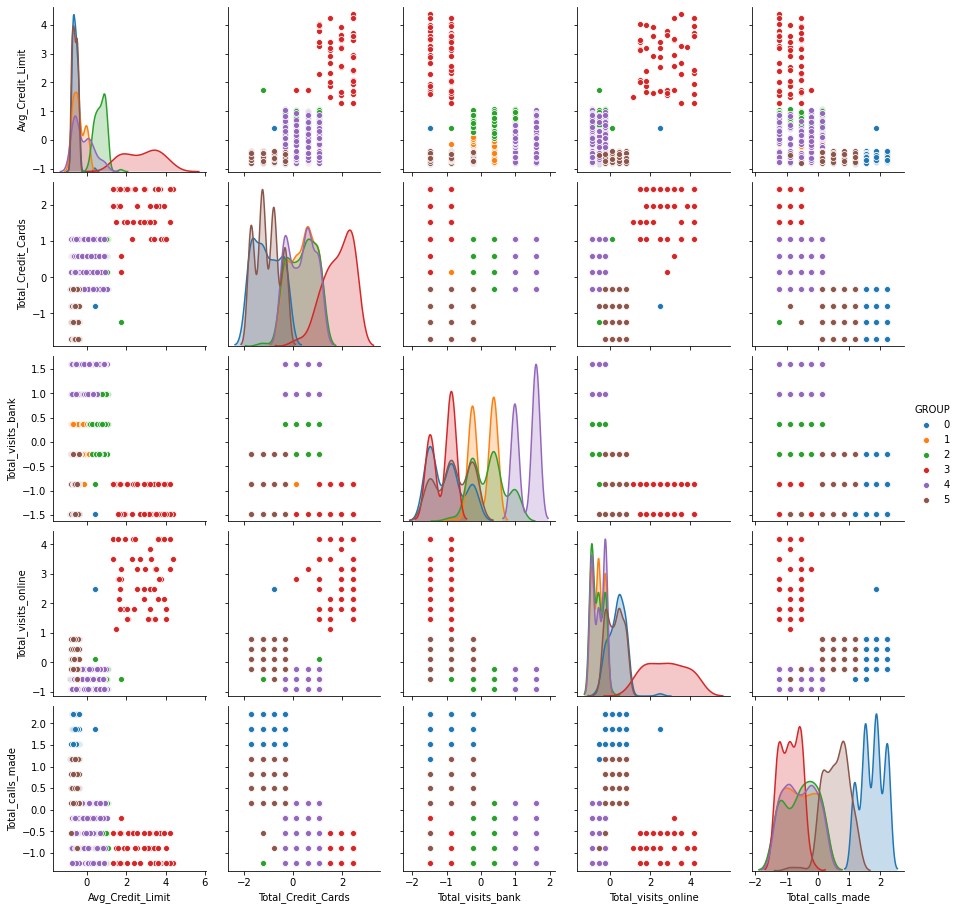

In [163]:
kmodel=KMeans(6)
kmodel.fit(mydata_z)
prediction=kmodel.predict(mydata_z)

#Append the prediction
mydata_z["GROUP"] = prediction

print(mydata_z.head())

mydata_z.boxplot(by = 'GROUP',  layout=(2,4), figsize=(20, 15))
plt.show()

# pair-plot
columns = ['Avg_Credit_Limit', 'Total_Credit_Cards', 'Total_visits_bank','Total_visits_online', 'Total_calls_made']

columns.append("GROUP")
plt.figure(figsize=(25,25))
sns.pairplot( mydata_z[columns], hue="GROUP")
plt.show()

In [67]:
# How many different segments of customers are there?
# 6


# How are these segments different from each other?
# I am not numbering them because the labels changes each time we rerun but basically there are 6 clusters

# # Group A: avg_credit_limit , total_credit_card moderate, calls made and online visit low, total visit to bank - pretty high.
# # seems they are using cards pretty decent amount and visiting branches too often but not great in online. 
# so this could be the elderly citizen
#
# # Group B: avg_credit_limit , total_credit_card low,calls made high, total visit to bank and online visit moderate : 
# seems these customers are actually not using card
# # but more interested in knowing the offers. They are still deciding stage. could be students or not having high earnings
#
# # Group C: avg_credit_limit , total_credit_card very high, calls made and bank visit low but online visit extremely high.
# # they seem to be very active in purchase and the working class of the society.

# # Group D: same like Group-B. even lesser calls made
#
# # Group E: same as Group-A: with bit higher avg_credit_limit and total_credit_card, and total visit to bank is less.
## so seems they fall in between Group-A and Group-C
#
# # Group F: avg_credit_limit is low.  total_credit_card is at higher side. calls made ,  bank visit low and even
# online visit are low. # # This group seems suspicious as credit limit is low but they have high no. of credit cards


# But we can combine these 6 clusters into 4 as well.
# Based on the mathematical interpretetion => 5 or 6 gives the best Sihoutte score and also the dendograms points towards the same
# but based on business needs, we can club some clusters and make it into 4 as below-
# 1. Group- A &E
# 2. Group- B & D
# 3. Group- C
# 4. Group- F

In [147]:
# What are your recommendations to the bank on how to better market to and service these customers?
mydata_z["GROUP"].value_counts()

2    185
4    115
1    110
3    105
5     84
0     50
Name: GROUP, dtype: int64

In [ ]:
## Group-A: help them by Providing self-service support content across bank and credit web so that don't have to visit the bank 
# so often. Also, since they have pretty moderate number of credit cards- we can plan to offer them some small benefits so
# that they are retained
# Reliable and falls the majority - best to retain them with some offers.

### Group-B and Group-D seems like very low-income group or students. So there is not much point marketing for them.

### Group-C is the most active group and we should market them will upgraded cards and credit limits. They are just handful but the
# are most profitable .

### Group-E has a good amount to be turned into Group-2, so definitely we need to offer them good rates and increase the 
# credit limits

### Group-F seems suspicious, so we shouldn't offer any more cards. Proper background verification should be done before any
# requests to be served to them.